# Consulting Project for house price investor

#### _Name - Callum Ballard_





In this project, we will consult for a property investor, and advise on American regions, major cities that they should invest in in. We will isolate a group of the most promising regions, then run forecasting analysis to pinpoint those regions with the very best potential.


## 1. Bring In Required Libraries
Import the libraries we'll need for this project, and define our visualisation preferences.

In [52]:
#For the initial data exploration
import numpy as np
import pandas as pd
import datetime
from datetime import timedelta

In [53]:
#For data visualisation
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.lines import Line2D
import matplotlib.font_manager
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
from matplotlib.pylab import rcParams


In [54]:
#For the time series modelling
import itertools
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

#Suppress warnings from showing
import warnings
warnings.filterwarnings('ignore')

#Allow ourselves to save models
import pickle

In [55]:
#Define colours for the visuals
CB91_Blue = '#2CBDFE'
CB91_Green = '#47DBCD'
CB91_Pink = '#F3A0F2'
CB91_Purple = '#9D2EC5'
CB91_Violet = '#661D98'
CB91_Amber = '#F5B14C'
CB91_Crimson = '#CD3333'
CB91_Black = '#000000'
CB91_Oliver = '#9ACD32'
CB91_Orange = '#FF8247'


CB91_BlueD = '#016794'
CB91_GreenD = '#187970'
CB91_PinkD = '#B317B1'
CB91_PurpleD = '#4E1762'
CB91_VioletD = '#330E4C'
CB91_AmberD = '#985E09'

CB91_BlueL = '#ABE5FF'
CB91_GreenL = '#B5F1EB'
CB91_PinkL = '#FAD9FA'
CB91_PurpleL = '#D9A8EB'
CB91_VioletL = '#ECD4F5'
CB91_AmberL = '#F9D094'

In [56]:
#The following gradients will be used for heatmaps, etc
CB91_Grad_BP = ['#2CBDFE', '#2fb9fc', '#33b4fa', '#36b0f8',
                '#3aacf6', '#3da8f4', '#41a3f2', '#449ff0',
                '#489bee', '#4b97ec', '#4f92ea', '#528ee8',
                '#568ae6', '#5986e4', '#5c81e2', '#607de0',
                '#6379de', '#6775dc', '#6a70da', '#6e6cd8',
                '#7168d7', '#7564d5', '#785fd3', '#7c5bd1',
                '#7f57cf', '#8353cd', '#864ecb', '#894ac9',
                '#8d46c7', '#9042c5', '#943dc3', '#9739c1',
                '#9b35bf', '#9e31bd', '#a22cbb', '#a528b9',
                '#a924b7', '#ac20b5', '#b01bb3', '#b317b1']

In [57]:
#A list that we'll use to cycle through colors in charts
color_list = [CB91_Blue, CB91_Green, CB91_Amber, CB91_Pink,
              CB91_Violet, CB91_BlueD, CB91_GreenD, CB91_Purple,
                CB91_AmberD, CB91_PinkD, CB91_VioletD]

In [58]:
#Use seaborn to set all the default chart visual settings
sns.set(font='Franklin Gothic Book',
        rc={
 'axes.axisbelow': False,
 'axes.edgecolor': 'lightgrey',
 'axes.facecolor': 'white',
 'axes.grid': False,
 'axes.labelcolor': 'dimgrey',
 'axes.spines.right': False,
 'axes.spines.top': False,
 'figure.facecolor': 'white',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'text.color': 'dimgrey',
 'xtick.bottom': False,
 'xtick.color': 'dimgrey',
 'xtick.direction': 'out',
 'xtick.top': False,
 'ytick.color': 'dimgrey',
 'ytick.direction': 'out',
 'ytick.left': False,
 'ytick.right': False})

sns.set_context("notebook", rc={"font.size":16,
                                "axes.titlesize":20,
                                "axes.labelsize":16})

plt.rcParams['axes.prop_cycle'] = plt.cycler(color=color_list)

# 2. Data Pre-Processing

In [59]:
df = pd.read_csv('Data/zillow_data2020.csv')
df
cols_of_interest = ['StateName','RegionType']
df.drop(cols_of_interest, axis=1, inplace=True)

In [60]:
df

,RegionID,SizeRank,RegionName,State,City,Metro,CountyName,1996-01-31,1996-02-29,1996-03-31,...,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31
0,61639,0,10025,NY,New York,New York-Newark-Jersey City,New York County,240227.0,238731.0,238811.0,...,1263498.0,1258462.0,1255108.0,1237464.0,1213945.0,1184708.0,1172697.0,1163787.0,1161592.0,1163169.0
1,84654,1,60657,IL,Chicago,Chicago-Naperville-Elgin,Cook County,209848.0,209692.0,209285.0,...,488603.0,487610.0,486842.0,486758.0,487956.0,489569.0,490612.0,490770.0,491112.0,492290.0
2,61637,2,10023,NY,New York,New York-Newark-Jersey City,New York County,247618.0,247670.0,247807.0,...,1156671.0,1159676.0,1179068.0,1198812.0,1212277.0,1212462.0,1222241.0,1227790.0,1233483.0,1236976.0
3,91982,3,77494,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,200202.0,200450.0,200253.0,...,335844.0,335848.0,335952.0,335676.0,335851.0,336272.0,337283.0,338136.0,338624.0,338802.0
4,84616,4,60614,IL,Chicago,Chicago-Naperville-Elgin,Cook County,284312.0,284053.0,283529.0,...,639873.0,638457.0,637151.0,636880.0,637169.0,637791.0,637309.0,636881.0,636623.0,637448.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30408,78801,34430,47865,IN,Carlisle,Terre Haute,Sullivan County,NaN,NaN,NaN,...,51166.0,51467.0,51711.0,51888.0,51998.0,52038.0,52007.0,51906.0,51671.0,51349.0
30409,66169,34430,20052,DC,Washington,Washington-Arlington-Alexandria,District of Columbia,NaN,NaN,NaN,...,1259396.0,1268869.0,1275825.0,1280947.0,1284323.0,1283836.0,1286923.0,1282294.0,1278947.0,1274732.0
30410,89666,34430,72630,AR,Diamond City,Harrison,Boone County,NaN,NaN,NaN,...,116032.0,117492.0,117896.0,117865.0,118101.0,119008.0,119455.0,119108.0,118714.0,118701.0
30411,58379,34430,1470,MA,Groton,Boston-Cambridge-Newton,Middlesex County,NaN,NaN,NaN,...,385468.0,389734.0,395503.0,397827.0,398590.0,398256.0,397974.0,397431.0,397000.0,396356.0


In [61]:
df['Metro'].fillna('Not known', inplace = True)
df.head()

,RegionID,SizeRank,RegionName,State,City,Metro,CountyName,1996-01-31,1996-02-29,1996-03-31,...,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31
0,61639,0,10025,NY,New York,New York-Newark-Jersey City,New York County,240227.0,238731.0,238811.0,...,1263498.0,1258462.0,1255108.0,1237464.0,1213945.0,1184708.0,1172697.0,1163787.0,1161592.0,1163169.0
1,84654,1,60657,IL,Chicago,Chicago-Naperville-Elgin,Cook County,209848.0,209692.0,209285.0,...,488603.0,487610.0,486842.0,486758.0,487956.0,489569.0,490612.0,490770.0,491112.0,492290.0
2,61637,2,10023,NY,New York,New York-Newark-Jersey City,New York County,247618.0,247670.0,247807.0,...,1156671.0,1159676.0,1179068.0,1198812.0,1212277.0,1212462.0,1222241.0,1227790.0,1233483.0,1236976.0
3,91982,3,77494,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,200202.0,200450.0,200253.0,...,335844.0,335848.0,335952.0,335676.0,335851.0,336272.0,337283.0,338136.0,338624.0,338802.0
4,84616,4,60614,IL,Chicago,Chicago-Naperville-Elgin,Cook County,284312.0,284053.0,283529.0,...,639873.0,638457.0,637151.0,636880.0,637169.0,637791.0,637309.0,636881.0,636623.0,637448.0


Text(0.5, 1.0, 'Number of Regions that Do not have price Data at given date')

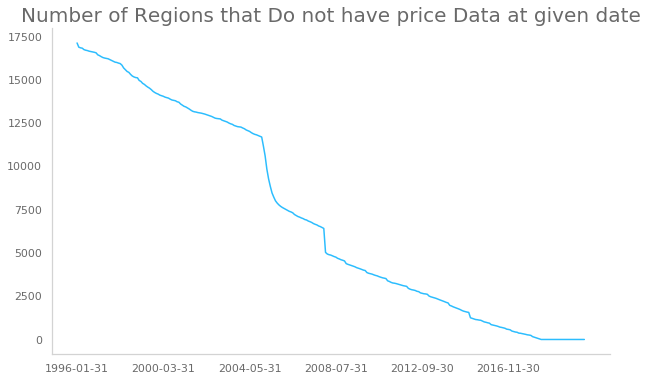

In [62]:
plt.figure(figsize=(10,6))
df.iloc[:,7:].isna().sum().plot();#####. Columns after No.7'
plt.title('Number of Regions that Do not have price Data at given date')

In [63]:
df.columns[139:]

Index(['2007-01-31', '2007-02-28', '2007-03-31', '2007-04-30', '2007-05-31',
       '2007-06-30', '2007-07-31', '2007-08-31', '2007-09-30', '2007-10-31',
       ...
       '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31', '2020-02-29',
       '2020-03-31', '2020-04-30', '2020-05-31', '2020-06-30', '2020-07-31'],
      dtype='object', length=163)

In [64]:
df.dropna(inplace=True, subset = list(df.columns[139:]))
#df.columns[139:] represents the months of April'07 onwards...a

In [65]:
list(df.columns[:7])

['RegionID', 'SizeRank', 'RegionName', 'State', 'City', 'Metro', 'CountyName']

In [66]:
def get_datetimes(df):
    return pd.to_datetime(df.columns.values[7:], format='%Y-%m')
df.columns = list(df.columns[:7]) + list(get_datetimes(df))

In [67]:
df_states = gpd.read_file("./States/states.shp")
#Change map projection
df_states = df_states.to_crs(epsg = 3395)
#Get the states in alphabetical order and set index
df_states = df_states.sort_values('STATE_ABBR')
df_states.set_index('STATE_ABBR', inplace = True)

# 3)  EDA and Visualization

In [68]:
def gradient_mapper(kpi,grad):
    
    kpi_min = kpi.min()
    kpi_max = kpi.max()
    colors = len(grad)-1
    first_map = list(map(lambda x: int(round(colors*(x-kpi_min) / (kpi_max-kpi_min),0)),list(kpi)))
    return list(map(lambda x: grad[x], first_map))


In [69]:
def state_map(kpi, grad, states = list(df_states.index),annot=True,pacific = True, dc = True,size = 30,cb = True):
    df_temp = df_states.loc[states,['geometry',kpi]]
    
    df_temp = df_temp.dropna()
    
    pacific_states = ['AK','HI']
    mainland_states = list(filter(lambda x: x not in pacific_states, list(df_temp.index)))
        
    if dc == False and dc in states:
        df_temp = df_temp.drop('DC')
        mainland_states.remove('DC')
        
    if pacific == False and 'HI' in states and 'AK' in states:
        df_temp = df_temp.drop(['HI','AK'])
        
        #... and the color gradient that we assign with the gradient mapper
    df_temp['Colors'] = gradient_mapper(kpi=df_temp[kpi],grad=grad)
        #declare a figure and axes
    fig, ax = plt.subplots(figsize=(size,size/2))
        #consider the mainland states first, plotting them in turn
    for i in mainland_states:
        df_temp.loc[[i]].plot(ax=ax, color=df_temp.loc[i,'Colors'])
                
        #if we are annotating...
        if annot == True:
            
            #locate the centre of each state...
            centroid = df_temp.loc[[i]].centroid
            
            #and plot the text there
            plt.annotate(s=f'{round(df_temp.loc[i,kpi],1)}',
                 xy=(centroid.x[i], centroid.y[i]),
                 horizontalalignment='center',
                 color='white',
                 fontsize=size/2)
            
    #Remove axis ticks
    ax.set_xticks([])
    ax.set_yticks([])
    
    #plot the Pacific states in separate subplots
    if pacific == True:
        if 'AK' in states:
            ax2 = fig.add_subplot(3,6,13)
            df_states.loc[['AK']].plot(ax=ax2,
                                       color=df_temp.loc['AK','Colors'])
            ax2.patch.set_alpha(0)
            ax2.set_xticks([])
            ax2.set_yticks([])
        
        if 'HI' in states:
            ax3 = fig.add_subplot(3,6,14)
            df_states.loc[['HI']].plot(ax=ax3,
                                       color=df_temp.loc['HI','Colors'])
            ax3.patch.set_alpha(0)
            ax3.set_xticks([])
            ax3.set_yticks([])
        
    #plot the colorbar
    if cb == True:        
        cmap = LinearSegmentedColormap.from_list(name= '', colors=grad, N=50)
        ax4 = fig.add_subplot(1,30,30)
        norm = mpl.colors.Normalize(vmin=df_temp[kpi].min(),
                                    vmax=df_temp[kpi].max())
        cb = mpl.colorbar.ColorbarBase(ax4, cmap=cmap,
                                       norm=norm, orientation='vertical')
        
        
    sns.despine(left=True,bottom=True)        ######   Removing axes spines

In [70]:
df_states['RegionCount'] = df.groupby('State').count()['RegionID'] 
#### We have to point RegionID here, because sometimes other columns' data maybe missing
#df_states['RegionCount'] 

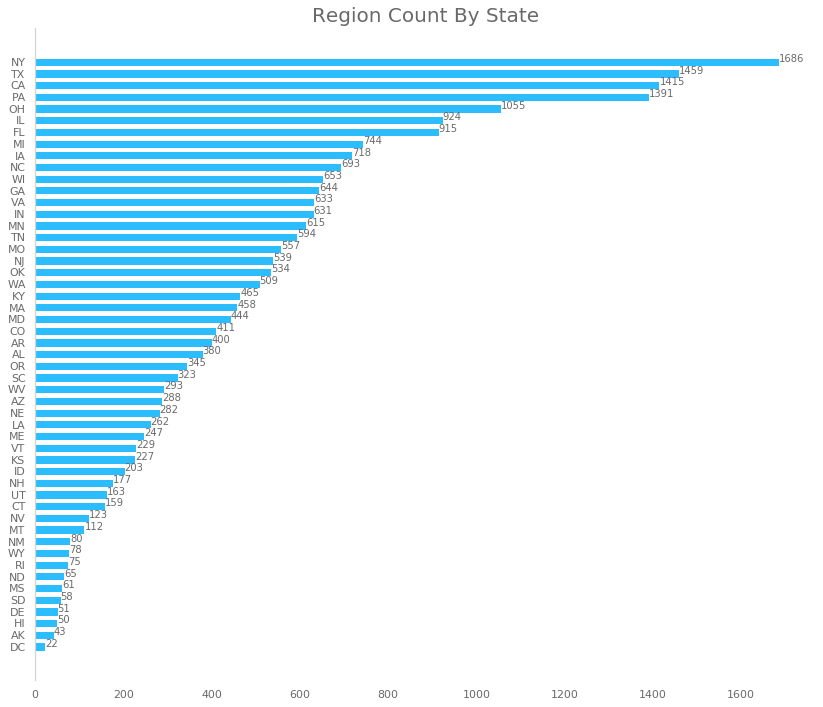

In [71]:
plt.figure(figsize=(14,12))

df_states_ordered = df_states.sort_values("RegionCount")
plt.barh(df_states_ordered.index,df_states_ordered['RegionCount'],height=0.7)
#matplotlib.pyplot.barh(y, width, height=0.8, left=None, *, align='center', **kwargs)
#y : scalar or array-like; width: scalar or array-like, width(s) of the bars.
#The y coordinates of the bars. See also align for the alignment of the bars to the coordinates.
#### https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.barh.html ###

sns.despine(bottom=True)  #### Without bottom line
#plt.xticks([])
#plt.ylim(0,51)
plt.title('Region Count By State')

for i, v in enumerate(df_states_ordered['RegionCount']):
    plt.text(v,i,str((v)), fontsize=10)

In [72]:
#The same data as a map...
#state_map(kpi = 'RegionCount', grad = CB91_Grad_BP, annot=False, pacific=True)

In [73]:
#Number of regions present in each state
#df_states['RegionCount'] = df.groupby('State').count()['RegionID']

#The median and mean region value by state
df_states['18-04_median'] = df.groupby(
    'State').median()[pd.to_datetime('2018-04-30', format='%Y-%m')]

df_states['18-04_mean'] = df.groupby(
    'State').mean()[pd.to_datetime('2018-04-30', format='%Y-%m')]

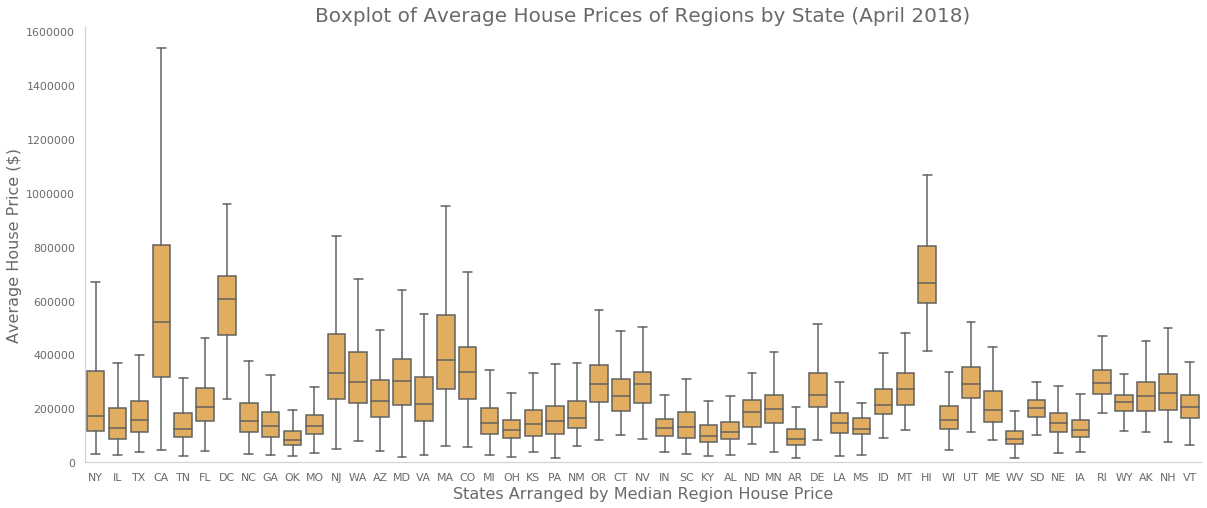

In [74]:
plt.figure(figsize=(20,8))

y = pd.to_datetime('2018-04-30', format='%Y-%m')

#state_order = df_states['18-04_median'].sort_values(ascending=False).index

sns.boxplot(x='State',y=y,
            data=df,
            showfliers=False, color = CB91_Amber)

plt.ylim(0,);
plt.xlabel('States Arranged by Median Region House Price')
plt.ylabel('Average House Price ($)')
plt.title('Boxplot of Average House Prices of Regions by State (April 2018)');

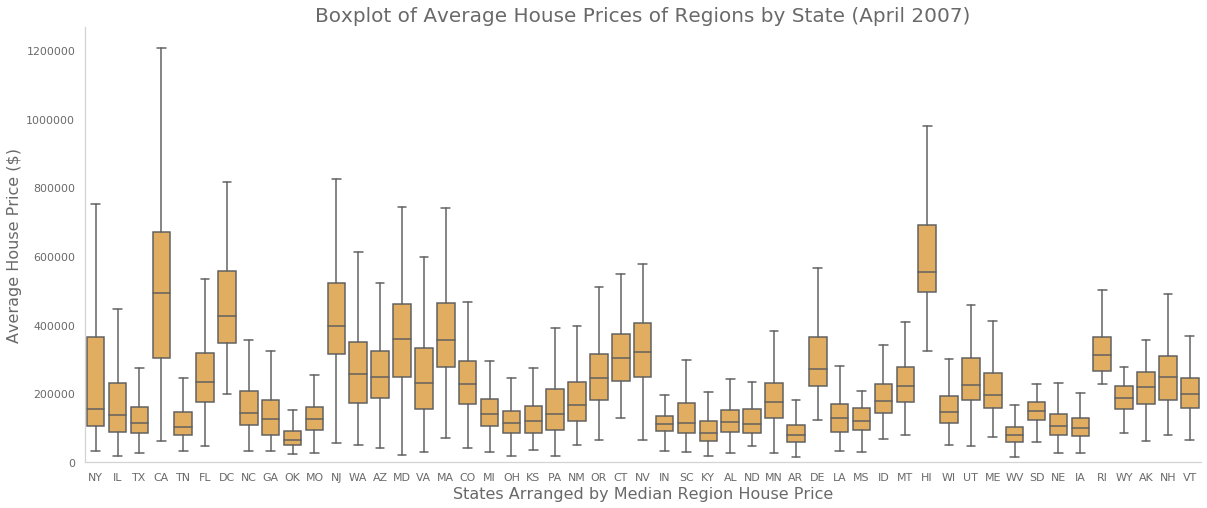

In [75]:
plt.figure(figsize=(20,8))

y = pd.to_datetime('2007-04-30', format='%Y-%m')

#state_order = df_states['18-04_median'].sort_values(ascending=False).index

sns.boxplot(x='State',y=y,
            data=df,
            showfliers=False, color = CB91_Amber)

plt.ylim(0,);
plt.xlabel('States Arranged by Median Region House Price')
plt.ylabel('Average House Price ($)')
plt.title('Boxplot of Average House Prices of Regions by State (April 2007)');

In [76]:
#state_map(kpi = '18-04_median', grad = CB91_Grad_AP, annot=False, pacific = True, dc = False)

In [77]:
#state_map(kpi='18-04_median',states = df_states.sort_values('18-04_median').index[:4],grad = CB91_Grad_AP, annot=False, pacific = True, dc = False)

In [78]:
#Create an empty dataframe...
df_sum = pd.DataFrame()

#And populate with summary statistics, quantities percentage
df_sum['Mean'] = df.mean()
df_sum['Min'] = df.min()
df_sum['05%'] = df.quantile(0.05)
df_sum['25%'] = df.quantile(0.25)
df_sum['50%'] = df.quantile(0.5)
df_sum['75%'] = df.quantile(0.75)
df_sum['95%'] = df.quantile(0.95)
df_sum['Max'] = df.max()
#### Well, we remove the non-digital columns automatically, but...
#Drop non-date rows, and reset the index
df_sum.drop(['RegionID','RegionName','SizeRank'], inplace=True)
df_sum.reset_index(inplace=True)

In [79]:
df_sum.tail()

,index,Mean,Min,05%,25%,50%,75%,95%,Max
290,2020-03-31,252389.070349,15011,70411.2,123533.0,186411.0,291873.5,640633.1,6.59039e+06
291,2020-04-30,253241.657625,15035,70690.1,123853.0,187203.0,293220.5,642365.3,6.5853e+06
292,2020-05-31,253938.221352,15045,70739.3,124159.5,187898.0,294290.0,643064.3,6.52344e+06
293,2020-06-30,254640.339182,15084,70782.1,124430.0,188595.0,295355.0,645516.8,6.46311e+06
294,2020-07-31,255637.603841,15091,70916.7,124911.0,189264.0,296856.5,647543.3,6.44473e+06


In [80]:
plt.figure(figsize=(12,12))

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

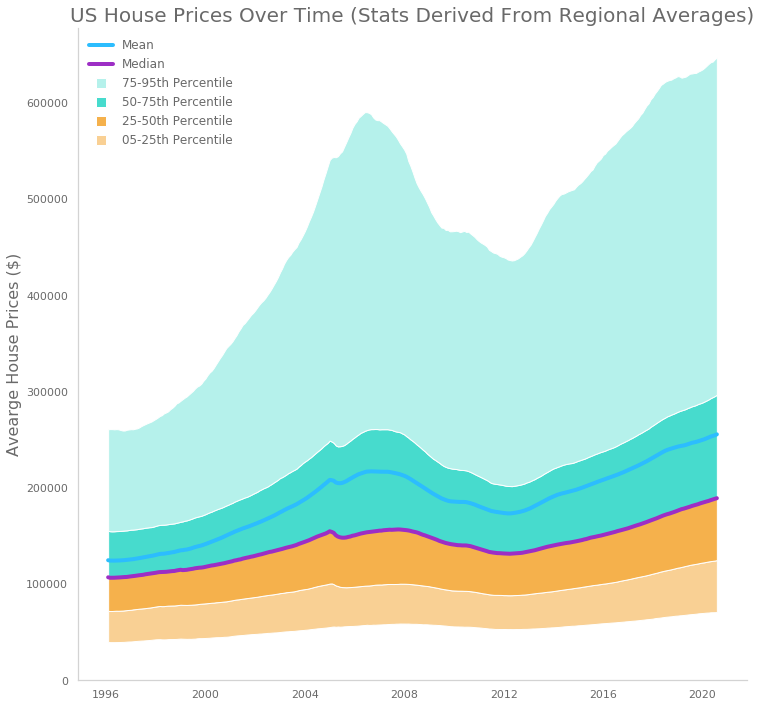

In [81]:
plt.figure(figsize=(12,12))

x = df_sum['index'].dt.to_pydatetime()

plt.plot(x,df_sum['Mean'],lw = 4, label = 'Mean House Price')
plt.plot(x, df_sum['50%'],lw = 4, label = 'Mean House Price', color = CB91_Purple)

plt.fill_between(x, df_sum['05%'], df_sum['25%'], facecolor=CB91_AmberL, interpolate=True)
plt.fill_between(x, df_sum['25%'], df_sum['50%'], facecolor=CB91_Amber, interpolate=True)
plt.fill_between(x, df_sum['50%'], df_sum['75%'], facecolor=CB91_Green, interpolate=True)
plt.fill_between(x, df_sum['75%'], df_sum['95%'], facecolor=CB91_GreenL, interpolate=True)

#plt.xticks([df_sum['index'][i] for i in range(len(df_sum)) if i%24 == 0])


#plt.xlim(df_sum['index'][0],df_sum['index'][len(df_sum)-1]);
plt.ylim(0,);

plt.title('US House Prices Over Time (Stats Derived From Regional Averages)')
plt.ylabel('Avearge House Prices ($)')

#################.  To assume Legend.   ####################
custom_lines = [Line2D([0], [0], c=CB91_Blue, lw=4,
                       markerfacecolor=CB91_GreenL, markersize=10),
                Line2D([0], [0], c=CB91_Purple, lw=4,
                       markerfacecolor=CB91_GreenL, markersize=10),
                Line2D([0], [0], marker='s', c='w',
                       markerfacecolor=CB91_GreenL, markersize=10),
                Line2D([0], [0], marker='s', c='w',
                       markerfacecolor=CB91_Green, markersize=10),
                Line2D([0], [0], marker='s', c='w',
                       markerfacecolor=CB91_Amber, markersize=10),
                Line2D([0], [0], marker='s', c='w',
                       markerfacecolor=CB91_AmberL, markersize=10),]
    
plt.legend(custom_lines,
           ['Mean','Median',
            '75-95th Percentile', '50-75th Percentile',
            '25-50th Percentile', '05-25th Percentile'],
           loc = 2,
           fontsize = 12,
           frameon=False);



In [356]:
df.head()

,RegionID,SizeRank,RegionName,State,City,Metro,CountyName,GrowthRegion,1996-01-31 00:00:00,1996-02-29 00:00:00,...,2019-10-31 00:00:00,2019-11-30 00:00:00,2019-12-31 00:00:00,2020-01-31 00:00:00,2020-02-29 00:00:00,2020-03-31 00:00:00,2020-04-30 00:00:00,2020-05-31 00:00:00,2020-06-30 00:00:00,2020-07-31 00:00:00
0,61639,0,10025,NY,New York,New York-Newark-Jersey City,New York County,1,240227.0,238731.0,...,1263498.0,1258462.0,1255108.0,1237464.0,1213945.0,1184708.0,1172697.0,1163787.0,1161592.0,1163169.0
1,84654,1,60657,IL,Chicago,Chicago-Naperville-Elgin,Cook County,0,209848.0,209692.0,...,488603.0,487610.0,486842.0,486758.0,487956.0,489569.0,490612.0,490770.0,491112.0,492290.0
2,61637,2,10023,NY,New York,New York-Newark-Jersey City,New York County,1,247618.0,247670.0,...,1156671.0,1159676.0,1179068.0,1198812.0,1212277.0,1212462.0,1222241.0,1227790.0,1233483.0,1236976.0
3,91982,3,77494,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,1,200202.0,200450.0,...,335844.0,335848.0,335952.0,335676.0,335851.0,336272.0,337283.0,338136.0,338624.0,338802.0
4,84616,4,60614,IL,Chicago,Chicago-Naperville-Elgin,Cook County,1,284312.0,284053.0,...,639873.0,638457.0,637151.0,636880.0,637169.0,637791.0,637309.0,636881.0,636623.0,637448.0


In [156]:
#We create a new dataframe df_stats which will hold this information
################################################################
#############. Calculate increasing percentage #################
df_stats = df[list(df.columns[:7])]

#Get the prices as at the start...
Apr96 = pd.to_datetime('1996-04-30', format='%Y-%m')
df_stats['Apr96'] = df[Apr96]

#Get the prices as at the peak...
Apr07 = pd.to_datetime('2007-04-30', format='%Y-%m')
df_stats['Apr07'] = df[Apr07]

#... the trough...
Apr12 = pd.to_datetime('2012-04-30', format='%Y-%m')
df_stats['Apr12'] = df[Apr12]

#... and the end point
Apr17 = pd.to_datetime('2017-04-30', format='%Y-%m')
df_stats['Apr17'] = df[Apr17]

Apr20 = pd.to_datetime('2020-04-30', format='%Y-%m')
df_stats['Apr20'] = df[Apr20]
###### ******************************************  ###########
#Then calculate the growth rate between each of these points for each region
df_stats['96-07%'] = df_stats['Apr07'] / df_stats['Apr96'] - 1
df_stats['07-12%'] = df_stats['Apr12'] / df_stats['Apr07'] - 1
df_stats['12-17%'] = df_stats['Apr17'] / df_stats['Apr12'] - 1
df_stats['17-20%'] = df_stats['Apr20'] / df_stats['Apr17'] - 1

df_stats.head()

,RegionID,SizeRank,RegionName,State,City,Metro,CountyName,Apr96,Apr07,Apr12,Apr17,Apr20,96-07%,07-12%,12-17%,17-20%
0,61639,0,10025,NY,New York,New York-Newark-Jersey City,New York County,238785.0,1043149.0,972071.0,1331089.0,1172697.0,3.368570,-0.068138,0.369333,-0.118994
1,84654,1,60657,IL,Chicago,Chicago-Naperville-Elgin,Cook County,209150.0,454760.0,385297.0,488736.0,490612.0,1.174325,-0.152747,0.268466,0.003838
2,61637,2,10023,NY,New York,New York-Newark-Jersey City,New York County,248689.0,838823.0,948076.0,1294369.0,1222241.0,2.372980,0.130246,0.365259,-0.055724
3,91982,3,77494,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,199065.0,256885.0,264432.0,331861.0,337283.0,0.290458,0.029379,0.254996,0.016338
4,84616,4,60614,IL,Chicago,Chicago-Naperville-Elgin,Cook County,283386.0,583007.0,494786.0,641746.0,637309.0,1.057289,-0.151321,0.297017,-0.006914


In [157]:

df_states['96-07%_mean'] = df_stats.groupby('State').mean()['96-07%']
df_states['07-12%_mean'] = df_stats.groupby('State').mean()['07-12%']
df_states['12-17%_mean'] = df_stats.groupby('State').mean()['12-17%']
df_states['17-20%_mean'] = df_stats.groupby('State').mean()['17-20%']


In [115]:
#state_map('96-07%_mean',grad=CB91_Grad_BP,annot=False)

In [116]:
#state_map('07-12%_mean',grad=CB91_Grad_BP,annot=False)

In [117]:
#state_map('12-17%_mean',grad=CB91_Grad_BP,annot=False)

In [118]:
#state_map('17-20%_mean',grad=CB91_Grad_BP,annot=False)

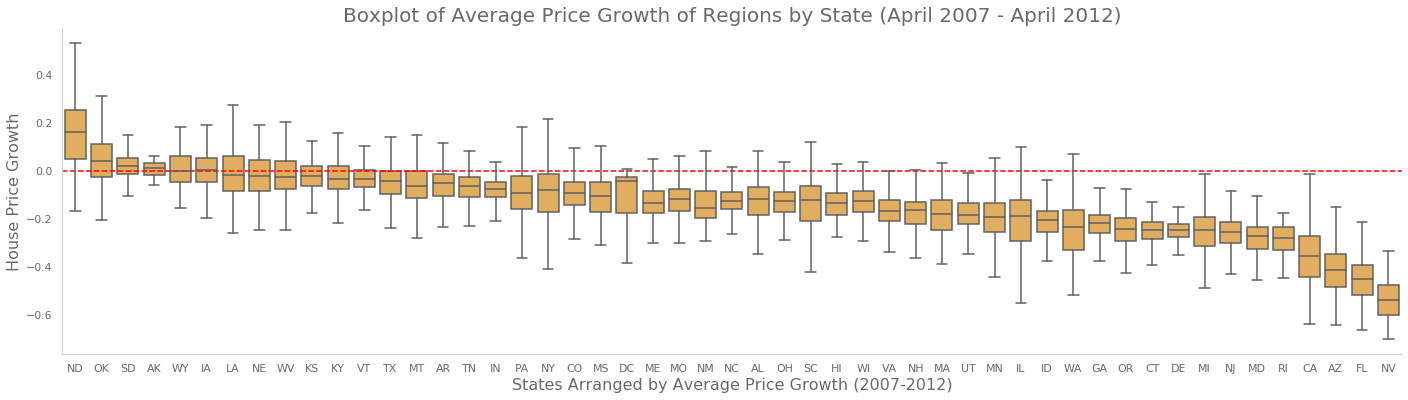

In [111]:
plt.figure(figsize=(24,6))

state_order = df_states['07-12%_mean'].sort_values(ascending=False).index

plt.axhline(0,color='red',ls="--")

sns.boxplot(x='State',y='07-12%',
            data=df_stats,order=state_order,
            showfliers=False, color = CB91_Amber)

#plt.ylim();
plt.xlabel('States Arranged by Average Price Growth (2007-2012)')
plt.ylabel('House Price Growth')
plt.title('Boxplot of Average Price Growth of Regions by State (April 2007 - April 2012)');

Text(0.5, 1.0, 'Boxplot of Average Price Growth of Regions by State (April 2012 - April 2017)')

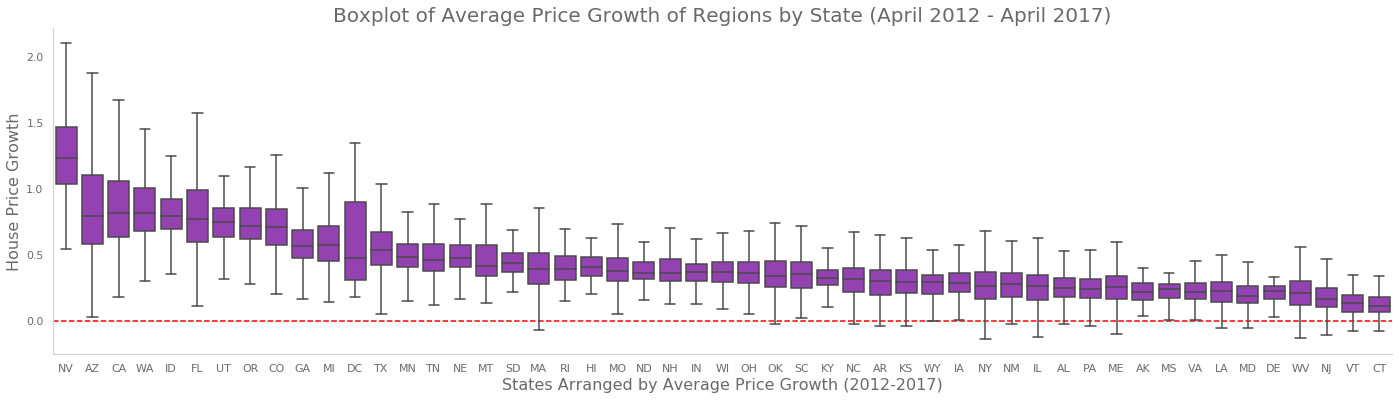

In [112]:
plt.figure(figsize=(24,6))
state_order = df_states['12-17%_mean'].sort_values(ascending=False).index
plt.axhline(0,color='red',ls='--')
sns.boxplot(x='State',y='12-17%',
           data=df_stats, order=state_order,
           showfliers=False, color = CB91_Purple)

plt.xlabel('States Arranged by Average Price Growth (2012-2017)')
plt.ylabel('House Price Growth')
plt.title('Boxplot of Average Price Growth of Regions by State (April 2012 - April 2017)')

In [90]:
#df_states['12-18%_mean'].sort_values(ascending=False)

## Data for population changes 

In [91]:
dfc_ = pd.read_csv('Data/nst-est-popchg2010_2019.csv')
dfc = dfc_.iloc[5:]   ####### Remove the region
dfc_region = dfc_.iloc[:5]

In [180]:
dfc_stats = dfc[list(dfc.columns[:16])]
dfc_stats = dfc_stats.drop(columns=['SUMLEV','REGION','DIVISION','ESTIMATESBASE2010','STATE'])
dfc_stats['Incresement%'] = dfc_stats['POPESTIMATE2019'] / dfc_stats['POPESTIMATE2010'] - 1
#dfc_stats['Incresement%'] 
#region = dfc_stats.head()

In [183]:
dfc_R = dfc_region[list(dfc_region.columns[:16])]
dfc_R = dfc_R.drop(columns=['SUMLEV','REGION','DIVISION','ESTIMATESBASE2010','STATE'])
dfc_R['Incresement%'] = dfc_R['POPESTIMATE2019'] / dfc_R['POPESTIMATE2010'] - 1
region = dfc_R

Text(0.5, 1.0, 'Boxplot of Population Growth of Regions by State (April 2010 - April 2019)')

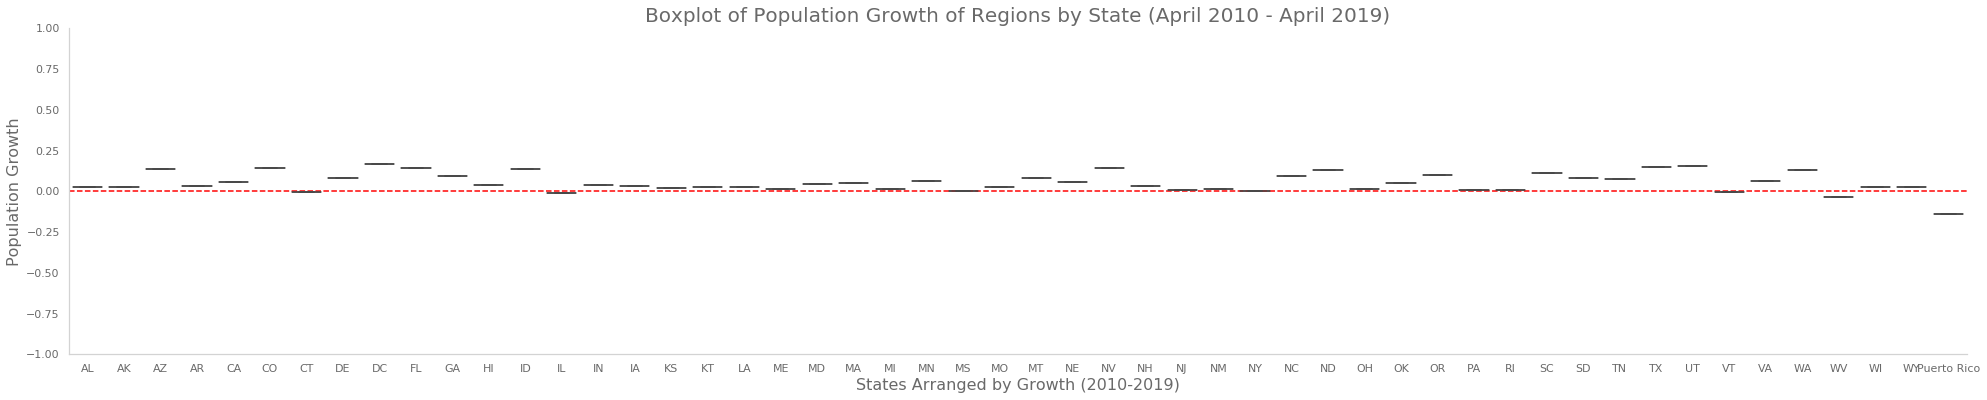

In [187]:
plt.figure(figsize=(34,6))
#change_order = dfc_stats['Incresement%'].sort_values(ascending=False)
plt.axhline(0,color='red',ls='--')
sns.boxplot(x='NAME',y='Incresement%',
           data=dfc_stats, 
           showfliers=False, color = CB91_Purple)
plt.ylim(-1,1)
plt.xlabel('States Arranged by Growth (2010-2019)')
plt.ylabel('Population Growth')
plt.title('Boxplot of Population Growth of Regions by State (April 2010 - April 2019)')

Text(0.5, 1.0, 'Boxplot of Average Price Growth of Regions by State (April 2012 - April 2018)')

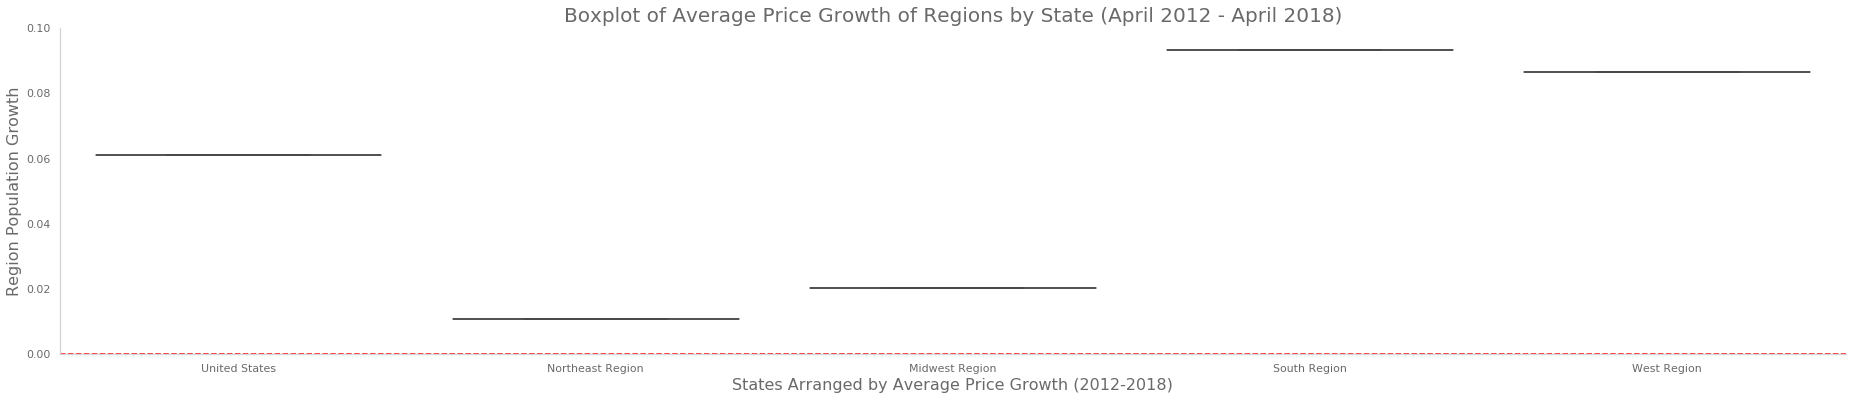

In [188]:
plt.figure(figsize=(32,6))
#change_order = dfc_stats['Incresement%'].sort_values(ascending=False)
plt.axhline(0,color='red',ls='--')
sns.boxplot(x='NAME',y='Incresement%',
           data=region, 
           showfliers=False, color = CB91_Purple)
plt.ylim(0,0.1)
plt.xlabel('States Arranged by Average Price Growth (2012-2018)')
plt.ylabel('Region Population Growth')
plt.title('Boxplot of Average Price Growth of Regions by State \
(April 2012 - April 2018)')

In [96]:
tmp = dfc_stats[5:60]
#tmp_stats.set_index("NAME", inplace = True)
tmp.head()
#tmp_stats.loc['Iowa']['Incresement%']
#df_temp = df_temp.dropna()
#tmp_stats['Incresement%']
states = list(tmp.index)

In [178]:
#dfc_stats[0:56]

In [98]:
tmp_stats = dfc_stats[0:51]
tmp_stats = tmp_stats.sort_values('NAME')
df_states['Incresement%'] = list(tmp_stats['Incresement%'])



## * Population increase in each state 

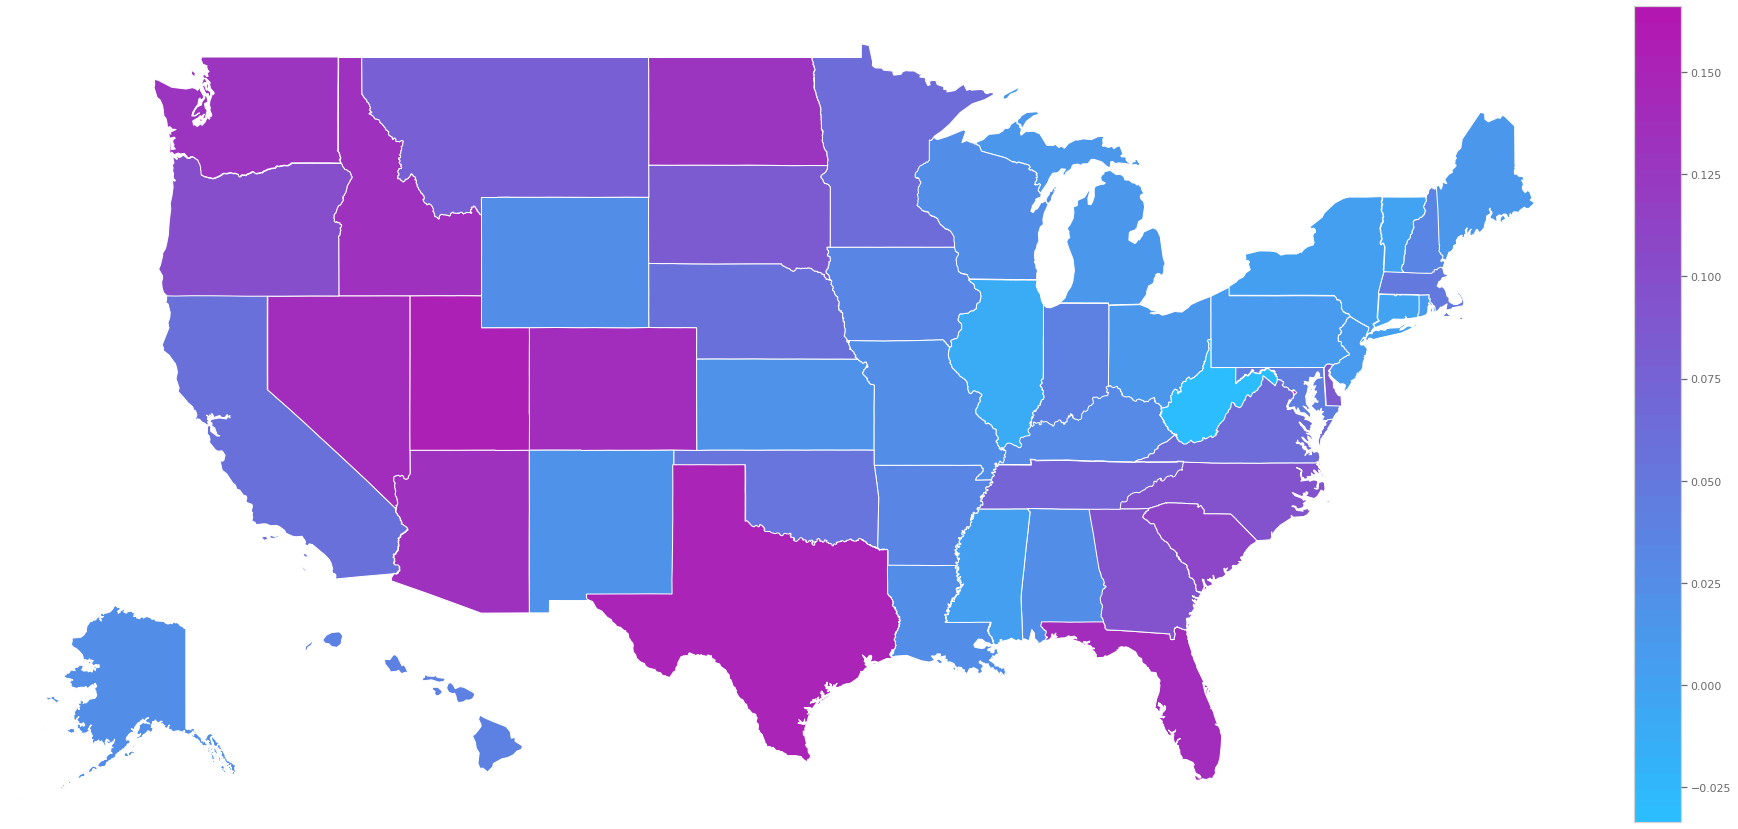

In [99]:
state_map('Incresement%',grad=CB91_Grad_BP,annot=False)

## Extreme house price increase/fall places

In [189]:
#Initiate an empty list for the regionIDs with extreme growth
extreme_codes = []

#Find the regions that had the biggest growth in each time period
extreme_codes.append(df_stats.sort_values(
    '96-07%').iloc[0]['RegionID'])

extreme_codes.append(df_stats.sort_values(
    '07-12%').iloc[0]['RegionID'])

extreme_codes.append(df_stats.sort_values(
    '12-17%').iloc[0]['RegionID'])

extreme_codes.append(df_stats.sort_values(
    '17-20%').iloc[0]['RegionID'])


#And the regions that had the biggest falls
extreme_codes.append(df_stats.sort_values(
    '96-07%', ascending = False).iloc[0]['RegionID'])

extreme_codes.append(df_stats.sort_values(
    '07-12%', ascending = False).iloc[0]['RegionID'])

extreme_codes.append(df_stats.sort_values(
    '12-17%', ascending = False).iloc[0]['RegionID'])

extreme_codes.append(df_stats.sort_values(
    '17-20%', ascending = False).iloc[0]['RegionID'])

print(extreme_codes)
#Create a dataframe that looks at these regions
df_extreme = df.loc[df['RegionID'].isin(extreme_codes)]
#Create a new column of county name, state name, which we'll use as an index
df_extreme['Index'] = df_extreme["City"].map(lambda x: f'{str(x)}, ') + df_extreme["State"]

df_extreme.set_index('Index', inplace=True)

#Transpose to create line plots, then we can plot all the timelines
df_extreme = df_extreme.iloc[:,8:].T

[63009, 95803, 73749, 88466, 95996, 80433, 90761, 76574]


In [355]:
df_extreme.tail()

Index,"Las Vegas, NV","Dallas, TX","Los Angeles, CA","Columbus, OH","Montgomery, AL","Syracuse, NY","Port Sulphur, LA","Marathon, IA"
2020-03-31 00:00:00,233721.0,322936.0,691222.0,205932.0,30479.0,99726.0,117870.0,87049.0
2020-04-30 00:00:00,235396.0,323343.0,692642.0,209012.0,30292.0,99986.0,118155.0,87350.0
2020-05-31 00:00:00,236428.0,324223.0,691767.0,210676.0,30185.0,99496.0,119015.0,87611.0
2020-06-30 00:00:00,236717.0,325292.0,690864.0,211164.0,30167.0,99304.0,120839.0,88009.0
2020-07-31 00:00:00,237639.0,327022.0,693204.0,211548.0,30164.0,99294.0,121472.0,88602.0


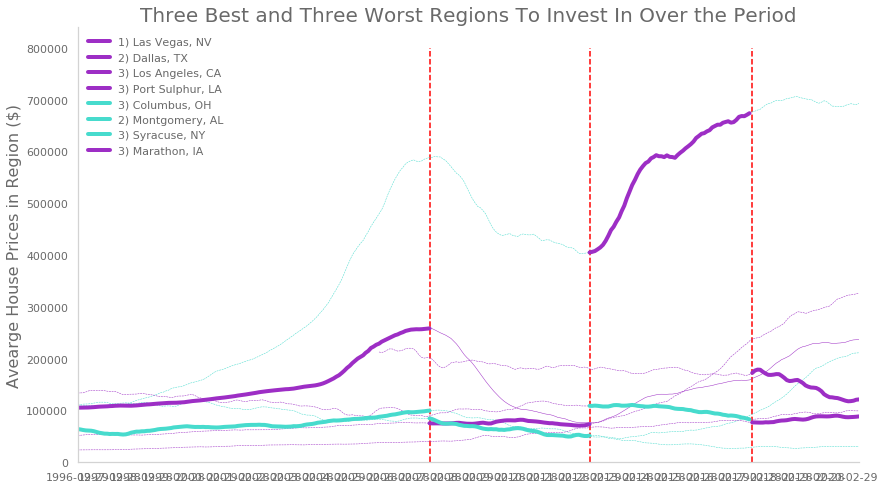

In [194]:
#Now plot the regions' prices over time...
plt.figure(figsize=(14,8))
#When a csv file is imported and a Data Frame is made, 
#the Date time objects in the file are read as a string object 
#rather a Date Time object and Hence it’s very tough to 
#perform operations like Time difference on a string rather a Date Time object. 
#Pandas to_datetime() method helps to convert string Date time into Python Date time object.
x = pd.to_datetime(df_extreme.index)
x1 = pd.to_datetime(df_extreme.index[:133])
x2 = pd.to_datetime(df_extreme.index[132:193])
x3 = pd.to_datetime(df_extreme.index[192:253])
x4 = pd.to_datetime(df_extreme.index[253:])

plt.plot(x, df_extreme['Las Vegas, NV'], color = CB91_Purple,
         lw = 0.5,  label = '')
plt.plot(x, df_extreme['Dallas, TX'], color = CB91_Purple,
         lw = 0.5, ls = '--', label = '')
plt.plot(x, df_extreme['Los Angeles, CA'], color = CB91_Green,
         lw = 0.5, ls = '--', label = '')
plt.plot(x, df_extreme['Columbus, OH'], color = CB91_Green,
         lw = 0.5, ls = '--', label = '')
plt.plot(x, df_extreme['Montgomery, AL'], color = CB91_Green,
         lw = 0.5, ls = '--', label = '')
plt.plot(x, df_extreme['Syracuse, NY'], color = CB91_Purple,
         lw = 0.5, ls = '--', label = '')
plt.plot(x, df_extreme['Port Sulphur, LA'], color = CB91_Purple,
         lw = 0.5, ls = '--', label = '')
plt.plot(x, df_extreme['Marathon, IA'], color = CB91_Purple,
         lw = 0.5, ls = '--', label = '')



plt.plot(x1, df_extreme['Las Vegas, NV'][x1], color = CB91_Purple,
         lw = 4, label = '1) Las Vegas, NV')
plt.plot(x2, df_extreme['Dallas, TX'][x2], color = CB91_Purple,
         lw = 4, label = '2) Dallas, TX')
plt.plot(x3, df_extreme['Los Angeles, CA'][x3], color = CB91_Purple,
         lw = 4, label = '3) Los Angeles, CA')
plt.plot(x4, df_extreme['Port Sulphur, LA'][x4], color = CB91_Purple,
         lw = 4, label = '3) Port Sulphur, LA')

plt.plot(x1, df_extreme['Columbus, OH'][x1], color = CB91_Green,
         lw = 4, label = '3) Columbus, OH')
plt.plot(x2, df_extreme['Montgomery, AL'][x2], color = CB91_Green,
         lw = 4, label = '2) Montgomery, AL')
plt.plot(x3, df_extreme['Syracuse, NY'][x3], color = CB91_Green,
         lw = 4, label = '3) Syracuse, NY')
plt.plot(x4, df_extreme['Marathon, IA'][x4], color = CB91_Purple,
         lw = 4, label = '3) Marathon, IA')



plt.vlines([x1[0],x2[0],x3[0],x4[0]],0,800000,color='red',linestyles='dashed')
plt.xticks([x[i] for i in range(len(df_extreme)) if i%12 == 0])
plt.xlim(x[0],x[-1]);
plt.ylim(0,);

plt.legend(frameon=False)##### No frame line for legend

plt.title('Three Best and Three Worst Regions To Invest In Over the Period');
plt.ylabel('Avearge House Prices in Region ($)');

# The price on major cities in U.S.

In [195]:
CHI = df.loc[(df['City'] == 'Chicago') & (df['State'] == 'IL')]
LA = df.loc[(df['City'] == 'Los Angeles') & (df['State'] == 'CA')]
HOU = df.loc[(df['City'] == 'Houston') & (df['State'] == 'TX')]
NYC = df.loc[(df['City'] == 'New York') & (df['State'] == 'NY')]
PHX = df.loc[(df['City'] == 'Phoenix') & (df['State'] == 'AZ')]
PHI = df.loc[(df['City'] == 'Philadelphia') & (df['State'] == 'PA')]
ATL = df.loc[(df['City'] == 'Atlanta') & (df['State'] == 'GA')]
SF = df.loc[(df['City'] == 'San Francisco') & (df['State'] == 'CA')]
DAL = df.loc[(df['City'] == 'Dallas') & (df['State'] == 'TX')]
MIA = df.loc[(df['City'] == 'Miami') & (df['State'] == 'FL')]

CHI_mean = CHI.groupby(['State','City']).mean()
LA_mean = LA.groupby(['State','City']).mean()
HOU_mean = HOU.groupby(['State','City']).mean()
NYC_mean = NYC.groupby(['State','City']).mean()
PHX_mean = PHX.groupby(['State','City']).mean()
ATL_mean = ATL.groupby(['State','City']).mean()
PHI_mean = PHI.groupby(['State','City']).mean()
SF_mean = SF.groupby(['State','City']).mean()
DAL_mean = DAL.groupby(['State','City']).mean()
MIA_mean = MIA.groupby(['State','City']).mean()


In [353]:
ASD = pd.concat([CHI_mean,LA_mean,HOU_mean,NYC_mean,PHX_mean,ATL_mean,PHI_mean,SF_mean,DAL_mean,MIA_mean], axis=0)

ASD.reset_index(inplace=True)
#ATL_mean = ATL_mean.rename(columns = {'index':'Atlanta,GA'})
ASD.index = ASD["City"] +','+ ASD["State"]
ASD = ASD.iloc[:,6:].T
ASD

,"Chicago,IL","Los Angeles,CA","Houston,TX","New York,NY","Phoenix,AZ","Atlanta,GA","Philadelphia,PA","San Francisco,CA","Dallas,TX","Miami,FL"
1996-02-29,143175.333333,188311.736842,118931.732558,185631.300699,111485.487179,146387.277778,77811.906977,3.267127e+05,138623.589744,131156.388889
1996-03-31,142948.145833,188432.189474,119000.523256,184443.541667,111886.076923,146652.944444,77712.558140,3.333452e+05,138860.871795,131250.000000
1996-04-30,143094.770833,188691.463158,119170.430233,184081.208333,112637.307692,147241.611111,77533.976744,3.321401e+05,139159.564103,131336.944444
1996-05-31,142924.375000,188952.515789,119302.872093,184066.048611,113350.487179,147845.055556,77415.465116,3.313680e+05,139501.820513,131468.444444
1996-06-30,143206.625000,189213.600000,119243.930233,184127.979167,113968.179487,148636.500000,77327.232558,3.306010e+05,139520.512821,131862.666667
...,...,...,...,...,...,...,...,...,...,...
2020-03-31,306825.280000,944658.395833,248800.050505,713117.061350,329199.256410,379701.950000,230362.543478,1.494931e+06,323851.195122,360161.000000
2020-04-30,307491.360000,951995.552083,249850.777778,712948.901840,333021.615385,380620.350000,232000.152174,1.495832e+06,324747.487805,360891.444444
2020-05-31,307994.780000,954830.093750,250613.040404,712334.453988,336279.410256,380309.850000,233235.652174,1.487998e+06,326115.731707,361070.277778
2020-06-30,308764.280000,956833.218750,251037.333333,712095.644172,339324.717949,381228.350000,234775.760870,1.478219e+06,327469.243902,361180.666667


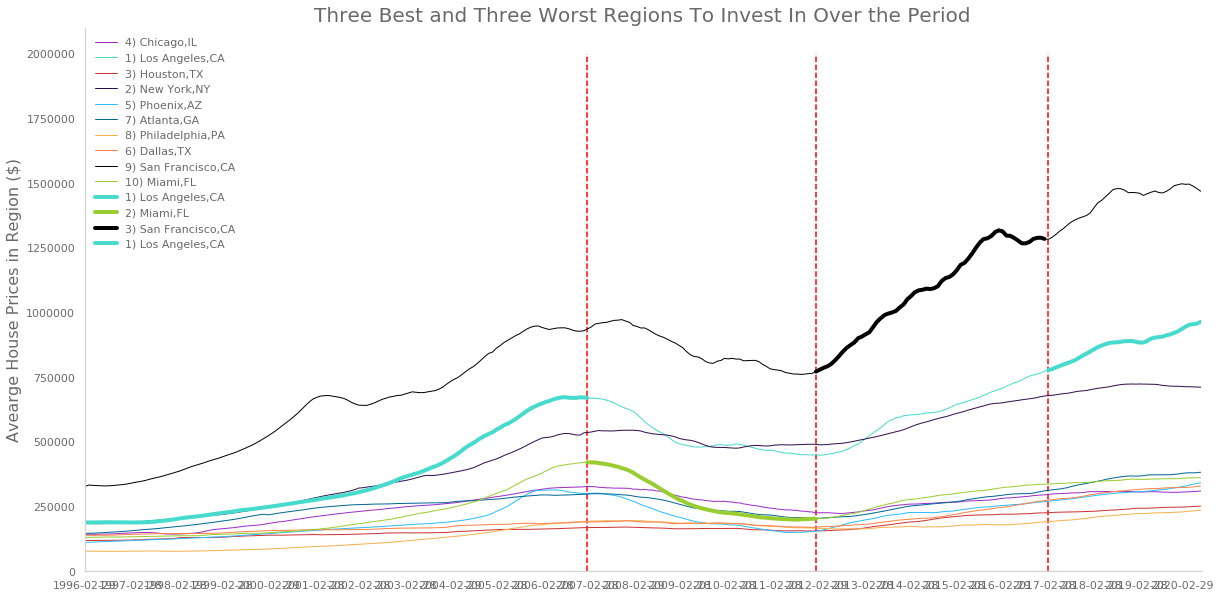

In [199]:
plt.figure(figsize=(20,10))
####### 02/28
x = pd.to_datetime(df_extreme.index)
x1 = pd.to_datetime(df_extreme.index[:133])
x2 = pd.to_datetime(df_extreme.index[132:193])
x3 = pd.to_datetime(df_extreme.index[192:253])
x4 = pd.to_datetime(df_extreme.index[253:])
######## x must have same length with ASD rows.  ########
plt.plot(x, ASD['Chicago,IL'], color = CB91_Purple,
         lw = 1,  label = '4) Chicago,IL')
plt.plot(x, ASD['Los Angeles,CA'], color = CB91_Green,
         lw = 1,  label = '1) Los Angeles,CA')
plt.plot(x, ASD['Houston,TX'], color = CB91_Crimson,
         lw = 1,  label = '3) Houston,TX')
plt.plot(x, ASD['New York,NY'], color = CB91_VioletD,
         lw = 1,  label = '2) New York,NY')
plt.plot(x, ASD['Phoenix,AZ'], color = CB91_Blue,
         lw = 1,  label = '5) Phoenix,AZ')
plt.plot(x, ASD['Atlanta,GA'], color = CB91_BlueD,
         lw = 1,  label = '7) Atlanta,GA')
plt.plot(x, ASD['Philadelphia,PA'], color = CB91_Amber,
         lw = 1,  label = '8) Philadelphia,PA')
plt.plot(x, ASD['Dallas,TX'], color = CB91_Orange,
         lw = 1,  label = '6) Dallas,TX')
plt.plot(x, ASD['San Francisco,CA'], color = CB91_Black,
         lw = 1,  label = '9) San Francisco,CA')
plt.plot(x, ASD['Miami,FL'], color = CB91_Oliver,
         lw = 1,  label = '10) Miami,FL')


plt.plot(x1, ASD['Los Angeles,CA'][x1], color = CB91_Green,lw = 4, label = '1) Los Angeles,CA')
plt.plot(x2, ASD['Miami,FL'][x2],color = CB91_Oliver,lw=4,label='2) Miami,FL')
plt.plot(x3, ASD['San Francisco,CA'][x3],color = CB91_Black,lw=4,label='3) San Francisco,CA')
plt.plot(x4, ASD['Los Angeles,CA'][x4], color = CB91_Green,lw = 4, label = '1) Los Angeles,CA')

plt.vlines([x1[0],x2[0],x3[0],x4[0]],0,2000000,color='red',linestyles='dashed')
plt.xticks([x[i] for i in range(len(ASD)) if i%12 ==0])
#plt.xticks([x[i] for i in range(len(df_extreme)) if i%12 == 0])
plt.xlim(x[0],x[-1]);
plt.ylim(0,);

plt.legend(frameon=False)##### No frame line for legend

plt.title('Three Best and Three Worst Regions To Invest In Over the Period');
plt.ylabel('Avearge House Prices in Region ($)');

In [354]:
df_stats.head()

,RegionID,SizeRank,RegionName,State,City,Metro,CountyName,Apr96,Apr07,Apr12,Apr17,Apr20,96-07%,07-12%,12-17%,17-20%
0,61639,0,10025,NY,New York,New York-Newark-Jersey City,New York County,238785.0,1043149.0,972071.0,1331089.0,1172697.0,3.368570,-0.068138,0.369333,-0.118994
1,84654,1,60657,IL,Chicago,Chicago-Naperville-Elgin,Cook County,209150.0,454760.0,385297.0,488736.0,490612.0,1.174325,-0.152747,0.268466,0.003838
2,61637,2,10023,NY,New York,New York-Newark-Jersey City,New York County,248689.0,838823.0,948076.0,1294369.0,1222241.0,2.372980,0.130246,0.365259,-0.055724
3,91982,3,77494,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,199065.0,256885.0,264432.0,331861.0,337283.0,0.290458,0.029379,0.254996,0.016338
4,84616,4,60614,IL,Chicago,Chicago-Naperville-Elgin,Cook County,283386.0,583007.0,494786.0,641746.0,637309.0,1.057289,-0.151321,0.297017,-0.006914


findfont: Font family ['Franklin Gothic Book'] not found. Falling back to DejaVu Sans.


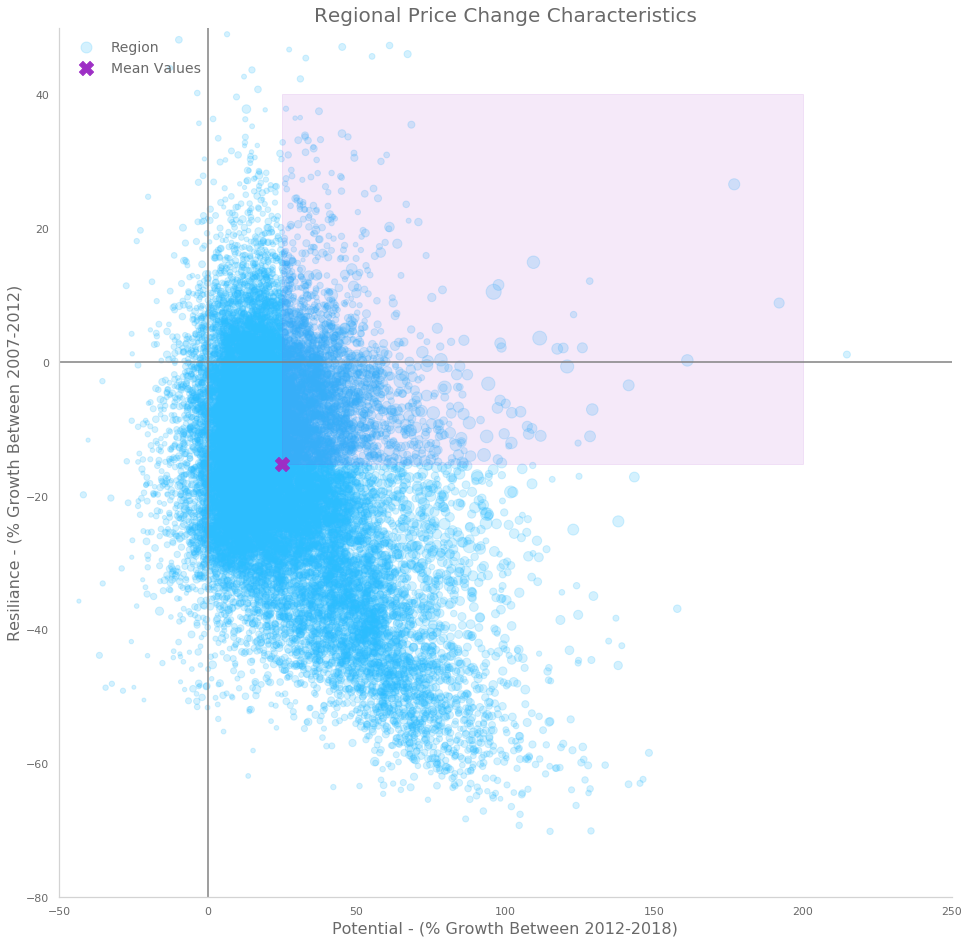

In [202]:
#translate the current house price values
#this will be used to size the points on the scatter, or the plot is too big
trans_values = np.sqrt(df_stats['Apr17'])/10

#calculate the average x and y values
avg_res = df_stats['07-12%'].mean()
avg_pot = df_stats['12-17%'].mean()

plt.figure(figsize=(16,16))

#plot the scatter
plt.scatter(df_stats['12-17%'] * 100, df_stats['07-12%'] * 100,
            s=trans_values, alpha=0.2, label='Region');

#and plot a point showing the average
plt.scatter(avg_pot * 100, avg_res * 100, s=200,
            color=CB91_Purple, marker='X', label='Mean Values');

#shade the region that is above both averages
plt.fill_between([avg_pot*100, 200], [avg_res*100, avg_res*100], [40,40],
        color=CB91_Purple, alpha=0.1)

plt.axhline(0,color='grey')
plt.axvline(0,color='grey')

plt.ylim(-80,50)
plt.xlim(-50,250)
plt.legend(loc=2, frameon=False, fontsize=14)

plt.title('Regional Price Change Characteristics')
plt.xlabel('Potential - (% Growth Between 2012-2017)');
plt.ylabel('Resiliance - (% Growth Between 2007-2012)');

In [203]:
df_stats_growth = df_stats.loc[(df_stats['07-12%']>avg_res) &
                               (df_stats['12-17%']>avg_pot)]
growth_regions = list(df_stats_growth['RegionID'])

#Add a column to the original dataframe to see
#if the region is in the growth group or not
df['GrowthRegion'] = df['RegionID'].map(lambda x: 1 if x in growth_regions else 0)

cols = list(df.columns)
df = df[cols[:7] + [cols[-1]] + cols[7:-1]]   ###### Remove the last column
###########. df[cols[7:272]] == df[cols[7:-1]]

In [204]:

def indexed_time_series(start,df=df,drop_na=True):
    
    '''
    Takes a point in time 'start', and returns a dataframe
    that indexes all house prices to this start time (which is indexed to 100) 
    '''
    start = pd.to_datetime(start, format='%Y-%m') #### We need to do this cause we need to calculate division
    new_df = df[['RegionID','State','GrowthRegion']]
    for i in df.columns[8:]:
        new_df[i] = 100 *(df[i] / df[start])
        #print(new_df[i])
    #If drop_na is true, then drop all regions with any NAs
    if drop_na:
        new_df = new_df.dropna()
    
    return new_df

In [205]:
df.columns[9]

Timestamp('1996-02-29 00:00:00')

In [206]:
#df_07_indexed = indexed_time_series('2007-04')

#df_sum['Growth_Index'] = list(df_07_indexed.loc[df_07_indexed['RegionID'].isin(growth_regions)].median()[2:])

#df_sum['Non_Growth_Index'] = list(df_07_indexed.loc[~df_07_indexed['RegionID'].isin(growth_regions)].median()[2:])

In [207]:
df_sum

,index,Mean,Min,05%,25%,50%,75%,95%,Max
0,1996-01-31,124795.838153,11061,39816.80,72156.75,107056.5,155415.50,260936.45,1.94349e+06
1,1996-02-29,124424.236760,11044,39659.40,71998.25,106556.0,154912.75,261058.35,1.93836e+06
2,1996-03-31,124360.809425,11062,39661.70,72018.50,106561.0,154808.50,261029.60,1.91739e+06
3,1996-04-30,124390.672288,11057,39638.70,72194.50,106609.0,154873.00,260828.50,1.88493e+06
4,1996-05-31,124449.728737,11067,39705.25,72316.00,106722.5,155061.00,261034.75,1.83246e+06
...,...,...,...,...,...,...,...,...,...
290,2020-03-31,252389.070349,15011,70411.20,123533.00,186411.0,291873.50,640633.10,6.59039e+06
291,2020-04-30,253241.657625,15035,70690.10,123853.00,187203.0,293220.50,642365.30,6.5853e+06
292,2020-05-31,253938.221352,15045,70739.30,124159.50,187898.0,294290.00,643064.30,6.52344e+06
293,2020-06-30,254640.339182,15084,70782.10,124430.00,188595.0,295355.00,645516.80,6.46311e+06


In [208]:
'''
plt.figure(figsize=(12,6))

x = df_sum['index']

plt.plot(x, df_sum['Growth_Index'], lw = 2,
         label = 'Growth Regions - Median House Price')

plt.plot(x, df_sum['Non_Growth_Index'], lw = 2,
         label = 'Other Regions - Median House Price')

plt.axhline(100,color='red',ls="--")

plt.legend(fontsize=12, loc=2, frameon=False);

plt.title('US House Prices Over Time (April 2007 Indexed to 100)')
plt.ylabel("Avearge House Prices");

plt.xlim();
'''

'\nplt.figure(figsize=(12,6))\n\nx = df_sum[\'index\']\n\nplt.plot(x, df_sum[\'Growth_Index\'], lw = 2,\n         label = \'Growth Regions - Median House Price\')\n\nplt.plot(x, df_sum[\'Non_Growth_Index\'], lw = 2,\n         label = \'Other Regions - Median House Price\')\n\nplt.axhline(100,color=\'red\',ls="--")\n\nplt.legend(fontsize=12, loc=2, frameon=False);\n\nplt.title(\'US House Prices Over Time (April 2007 Indexed to 100)\')\nplt.ylabel("Avearge House Prices");\n\nplt.xlim();\n'

In [209]:
df_rise = df.loc[df['GrowthRegion']==1]
df_fall = df.loc[df['GrowthRegion']==0]
df_fall

,RegionID,SizeRank,RegionName,State,City,Metro,CountyName,GrowthRegion,1996-01-31 00:00:00,1996-02-29 00:00:00,...,2019-10-31 00:00:00,2019-11-30 00:00:00,2019-12-31 00:00:00,2020-01-31 00:00:00,2020-02-29 00:00:00,2020-03-31 00:00:00,2020-04-30 00:00:00,2020-05-31 00:00:00,2020-06-30 00:00:00,2020-07-31 00:00:00
1,84654,1,60657,IL,Chicago,Chicago-Naperville-Elgin,Cook County,0,209848.0,209692.0,...,488603.0,487610.0,486842.0,486758.0,487956.0,489569.0,490612.0,490770.0,491112.0,492290.0
8,93144,8,79936,TX,El Paso,El Paso,El Paso County,0,84068.0,84024.0,...,136233.0,136376.0,136920.0,137565.0,138059.0,138339.0,138494.0,138538.0,138527.0,138774.0
9,84640,9,60640,IL,Chicago,Chicago-Naperville-Elgin,Cook County,0,123872.0,123517.0,...,313171.0,312633.0,312606.0,313256.0,314719.0,316261.0,316899.0,317039.0,317333.0,318461.0
11,61807,11,10467,NY,New York,New York-Newark-Jersey City,Bronx County,0,65336.0,64960.0,...,190638.0,191921.0,193021.0,193096.0,193595.0,192981.0,193782.0,194232.0,196402.0,196678.0
13,97564,13,94109,CA,San Francisco,San Francisco-Oakland-Hayward,San Francisco County,0,330387.0,328880.0,...,1183296.0,1191693.0,1203702.0,1207570.0,1211730.0,1210772.0,1212158.0,1207935.0,1202748.0,1200641.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30398,82132,34430,55144,MN,North Saint Paul,Minneapolis-St. Paul-Bloomington,Ramsey County,0,NaN,68901.0,...,234471.0,236763.0,237908.0,238793.0,240418.0,241708.0,243269.0,243074.0,243424.0,243035.0
30401,59376,34430,4109,ME,Portland,Portland-South Portland,Cumberland County,0,NaN,NaN,...,630792.0,632598.0,633663.0,637880.0,642320.0,646824.0,648153.0,648028.0,646548.0,645132.0
30402,66881,34430,21405,MD,Annapolis,Baltimore-Columbia-Towson,Anne Arundel County,0,424745.0,426013.0,...,968922.0,970340.0,970540.0,967175.0,963685.0,964031.0,963380.0,962470.0,962322.0,962424.0
30405,95186,34430,86343,AZ,Crown King,Prescott,Yavapai County,0,71539.0,70963.0,...,163883.0,164611.0,164644.0,165350.0,164319.0,165447.0,166379.0,166606.0,164552.0,162467.0


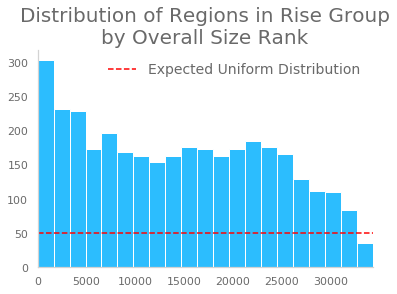

In [210]:

plt.hist(df_rise['SizeRank'], bins = 21)
plt.axhline(50,color='red',
            ls="--",label='Expected Uniform Distribution');
plt.xlim(0,df_rise['SizeRank'].max())
plt.legend(frameon=False, fontsize=14)
plt.title('Distribution of Regions in Rise Group\nby Overall Size Rank');

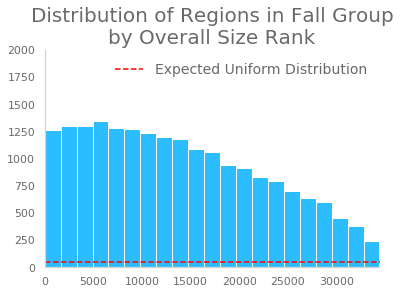

In [215]:
plt.hist(df_fall['SizeRank'], bins = 21)
plt.axhline(50,color='red',ls='--',label='Expected Uniform Distribution')
plt.xlim(0,df_fall['SizeRank'].max())
plt.ylim(0,2000)
plt.legend(frameon=False, fontsize=14)
plt.title('Distribution of Regions in Fall Group\nby Overall Size Rank');

In [216]:
#The number of growth regions in the state
df_states['GrowthRegions'] = df.groupby('State').sum()['GrowthRegion']

#The share of state regions that are growth regions
df_states['%GrowthRegions'] = df_states['GrowthRegions']/ df_states['RegionCount']


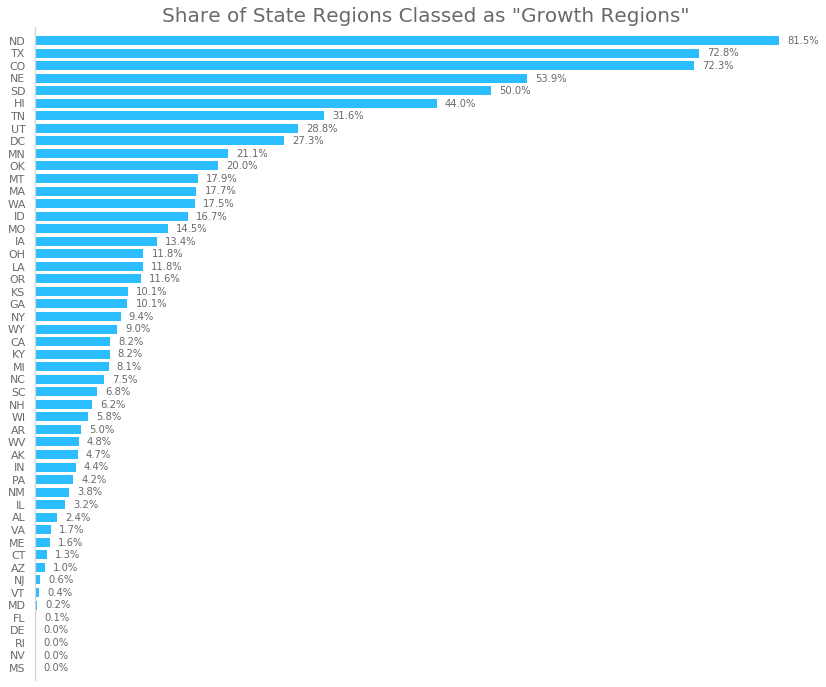

In [217]:
#Plot the share of state regions classed as growth regions
plt.figure(figsize=(14,12))

df_states_ordered = df_states.sort_values('%GrowthRegions')

plt.barh(df_states_ordered.index,df_states_ordered['%GrowthRegions'],height=0.8)

sns.despine(bottom=True)
plt.xticks([])     #######.  Remove X axis
plt.ylim(-1,51)

plt.title('Share of State Regions Classed as "Growth Regions"')

for i, v in enumerate(df_states_ordered['%GrowthRegions']):
    plt.text(v+0.009, i - 0.25, f'{str(round(v*100,1))}%', fontsize = 10)

In [218]:
#state_map('GrowthRegions',grad=CB91_Grad_BP,annot=False)
#state_map('%GrowthRegions',grad=CB91_Grad_BP,annot=False)


# Modeling

In [333]:
def ts_filter(regions, start = '1996-04-30', end = '2020-07-31', df = df):#***********************#
    '''Takes a list of regions, a start date, and and end date,
    and returns a time series dataframe with a region given in each column
    
    Parameters:
    - regions (list): The regions we want to keep
    - start (str): The first date to include in the dataframe (pass as 'YYYY-MM')
    - end (str): The last date to include in the dataframe (pass as 'YYYY-MM')
    - df (pandas dataframe): The dataframe we want to use    '''
    
    #Turn single entry into a list.
    #Allows user to enter a single regionID
    #if we just want to consider a single region
    if type(regions) != list:
        regions = [regions]
    
    #Change input dates to datetime objects
    start = pd.to_datetime(start, format='%Y-%m')
    end = pd.to_datetime(end, format='%Y-%m')
    
    #Create a new dataframe that filters regions,
    #and set the regionID to be the index
    df_temp = df.loc[df['RegionID'].isin(regions)]
    
    #We need to set the regionID to be a string
    #for the sake of the ARIMA modelling later
    df_temp['RegionID'] = df_temp['RegionID'].astype(str)
    df_temp.set_index(['RegionID'],inplace=True)

    #Find which columns the start and end dates represent in the dataframe
    columns = list(df_temp.columns)
    start_index = columns.index(start)
    end_index = columns.index(end)
    
    #Isolate the required dates in the dataframe
    #Transpose so that dates are the index
    df_temp = df_temp.iloc[:,start_index:end_index+1].T
    
    #We then need to reset the index, and set it back to the date
    #This ensures pandas treats the index elements as datetimes
    df_temp.reset_index(inplace=True)
    df_temp.set_index('index',inplace=True)
    
    return df_temp

In [300]:
#Augmented Dickey-Fuller unit root test.
'''
The Augmented Dickey-Fuller test can be used to test for a 
unit root in a univariate process in the presence of serial correlation.
'''
dftest = adfuller(df_sum['50%'])
dftest2 = adfuller(df_sum['50%'][192:])
print(f'p-value for all data = {round(dftest[1],3)}')
print(f'p-value for data from April 2012 = {dftest2[1]}')

p-value for all data = 0.839
p-value for data from April 2012 = 0.9986593466703593


In [301]:
dftest = adfuller(df_sum['Mean'])
dftest2 = adfuller(df_sum['Mean'][192:])
print(f'p-value for all data = {round(dftest[1],3)}')
print(f'p-value for data from April 2012 = {round(dftest2[1],3)}')


p-value for all data = 0.712
p-value for data from April 2012 = 0.943


In [302]:
df_sum

,index,Mean,Min,05%,25%,50%,75%,95%,Max
0,1996-01-31,124795.838153,11061,39816.80,72156.75,107056.5,155415.50,260936.45,1.94349e+06
1,1996-02-29,124424.236760,11044,39659.40,71998.25,106556.0,154912.75,261058.35,1.93836e+06
2,1996-03-31,124360.809425,11062,39661.70,72018.50,106561.0,154808.50,261029.60,1.91739e+06
3,1996-04-30,124390.672288,11057,39638.70,72194.50,106609.0,154873.00,260828.50,1.88493e+06
4,1996-05-31,124449.728737,11067,39705.25,72316.00,106722.5,155061.00,261034.75,1.83246e+06
...,...,...,...,...,...,...,...,...,...
290,2020-03-31,252389.070349,15011,70411.20,123533.00,186411.0,291873.50,640633.10,6.59039e+06
291,2020-04-30,253241.657625,15035,70690.10,123853.00,187203.0,293220.50,642365.30,6.5853e+06
292,2020-05-31,253938.221352,15045,70739.30,124159.50,187898.0,294290.00,643064.30,6.52344e+06
293,2020-06-30,254640.339182,15084,70782.10,124430.00,188595.0,295355.00,645516.80,6.46311e+06


In [303]:
#Define a standard series of parameters for the ARIMA model orders
p = q = d = [0,1,2]
d = [0,1]
#p : periods taken for autoregressive model
#d : integrated order, difference
#q : periods in moving average model
combs = list(itertools.product(p,d,q))  ##### the value itertions combination #####

def arima_selection(ts, combs=combs, split = 0.9):   
    '''
    Parameters
    - ts: The dataset that we want to fit to the model
    - Combs: The combinations of (p,d,q) that we want to consider
    - Split: The share of the dataset that we want to include in the train set
    
    Outputs:
    - The optimal (p,d,q) that minimises MSE on the test set
    - The fitted ARIMA model as an object
    '''
       #Calculate the index of the series that we'll use to do the train test split
    limit = int(len(ts) * split)
    
    #Create the train test series
    train = ts[:limit]
    test = ts[limit:]
    
    #Declare variables that we'll update and return later on
    rmse = None
    best_model = None
    best_order = None
    best_rmse = 10000000
    
    #Loop through the combinations...
    for i in combs:
        try:
            #Fit a model on the training set
            model = ARIMA(train,order=i)##Autoregressive Integrated Moving Average ARIMA(p,d,q) Model
            output = model.fit()
            #Predict forward the number equivalent to the length of the test set
            pred = output.forecast(len(test))[0]
            #Calculate the mean square error
            rmse = mean_squared_error(test, pred)**0.5
            
            #If we have a new best mse, then update the RMSE and model parameters
            if rmse < best_rmse:
                best_order = i
                best_rmse = rmse
                best_model = output

        except:
            continue
            
    if rmse == None:
        return None
    else:
        return best_order, best_model


In [304]:
def arima_forecast(output, periods):
    '''
    Parameters
    - output: A fitted statsmodel ARIMA model (as an object)
    - periods: The number of periods into the future that we want to forecast
    
    Outputs the fitted model as an object.
    Also outputs three series covering the number of
    periods set out in the parameters:
    1) the forecast
    2) lower bounds
    3) upper bounds
    '''

    #Calculate the forecast and isolate lower and upper bounds
    forecast = output.forecast(periods)
    lower = [i[0] for i in forecast[2]]
    upper = [i[1] for i in forecast[2]]

    return forecast[0], lower, upper


In [305]:
def arima_output(region, start='2012-04', periods = 120,
                 split = 0.9, combs = combs):
    
    '''
    Takes a region and produces a dataframe with a full output of statistics
    
    Parameters
    - region: The RegionID that we want to consider
    - start: The first date that we want to consider in the time series
    - periods: The number of periods into the future that we want to forecast
    - split: The share of the dataset that we want to include in the train set
    - combs: The combinations of (p,d,q) that we want to consider
    
    Outputs a one-row pandas dataframe with
    information about the ARIMA model for that region
    '''        
    ts = ts_filter(region,start=start)

    order, output = arima_selection(ts=ts, combs=combs, split = 0.9)
    
    #Guard against cases where no model could be fit to the region's data
    if order == None:
        return None

    else:
        forecast, lower, upper = arima_forecast(output=output, periods=periods)

        state = df.loc[df['RegionID']==region]['State'].item()
        county = df.loc[df['RegionID']==region]['CountyName'].item()

        df_temp = pd.DataFrame({'RegionID':[region],
                                'County':[county],
                                'State':[state],
                                'Order':[order],
                                'FittedModel':[output],
                                'Forecast':[forecast],
                                'Lower':[lower],
                                'Upper':[upper]})

        return df_temp

In [334]:
def arima_dataframe(regions, start='2012-04',
                    periods = 120, split = 0.9, combs = combs):
    
    '''
    Takes a list of regions and and produces a
    dataframe with a full output of statistics
    
    Parameters
    - regions: A list of RegionIDs that we want to consider
    - start: The first date that we want to consider in the time series
    - periods: The number of periods into the future that we want to forecast
    - split: The share of the dataset that we want to include in the train set
    - combs: The combinations of (p,d,q) that we want to consider
    
    Outputs a pandas dataframe with information about
    the ARIMA model for each region in the list
    '''
    
    #Declare an empty dataframe
    df_temp = pd.DataFrame()
    
    #Iterate through the regions in the list and
    #get the stats from the arima_output function
    for i in regions:
        region_df = arima_output(i, start=start,
                                 periods=periods, split = 0.9)
        df_temp = pd.concat([df_temp,region_df])
    
    return df_temp

In [307]:
#arima_df = arima_dataframe(growth_regions)

In [308]:
#with open('arima_df.pickle', 'wb') as f:
#    pickle.dump(arima_df, f, pickle.HIGHEST_PROTOCOL)

In [309]:
with open('data/arima_df.pickle', 'rb') as file:
    arima_df = pickle.load(file)

arima_df.reset_index(inplace=True, drop=True)
arima_df.head()

,RegionID,County,State,Order,FittedModel,Forecast,Lower,Upper
0,90668,Collin,TX,"(2, 0, 2)",<statsmodels.tsa.arima_model.ARMAResultsWrappe...,"[312143.40643119154, 314064.3150512036, 315783...","[311295.6384028486, 311722.3738888332, 311647....","[312991.17445953446, 316406.256213574, 319920...."
1,91733,Harris,TX,"(2, 0, 2)",<statsmodels.tsa.arima_model.ARMAResultsWrappe...,"[159747.67657177543, 160654.7091093458, 161428...","[159291.82129491118, 159377.0017145843, 159173...","[160203.5318486397, 161932.4165041073, 163683...."
2,91940,Harris,TX,"(1, 1, 2)",<statsmodels.tsa.arima_model.ARIMAResultsWrapp...,"[168312.6330976554, 169293.82987167052, 170217...","[167829.78990906934, 168010.72145518934, 16795...","[168795.47628624146, 170576.9382881517, 172481..."
3,97564,San Francisco,CA,"(1, 0, 0)",<statsmodels.tsa.arima_model.ARMAResultsWrappe...,"[3763964.854690347, 3764029.6776224324, 376409...","[3695309.2818519226, 3666959.8050405267, 36452...","[3832620.427528771, 3861099.550204338, 3882951..."
4,62037,Kings,NY,"(0, 1, 0)",<statsmodels.tsa.arima_model.ARIMAResultsWrapp...,"[855881.25, 860762.5, 865643.75, 870525.0, 875...","[841787.4753875756, 840830.8927980798, 841232....","[869975.0246124244, 880694.1072019202, 890054...."


In [310]:
arima_df['ARParams'] = arima_df['FittedModel'].map(lambda x: x.arparams)
arima_df['MAParams'] = arima_df['FittedModel'].map(lambda x: x.maparams)

arima_df['ModelAIC'] = arima_df['FittedModel'].map(lambda x: x.aic)
arima_df['ModelBIC'] = arima_df['FittedModel'].map(lambda x: x.bic)

#arima_df['Modelpvals'] = arima_df['FittedModel'].map(lambda x: x.pvalues)

In [311]:
arima_df.dropna(inplace=True)

# 5. Interpreting Results

In [312]:
len(arima_df['Forecast'][0])

120

In [335]:
arima_df['Abs5yGrowth'] = arima_df['Forecast'].map(lambda x: x[59] - x[0])  ##### 5 Years
arima_df['%5yGrowth'] = arima_df['Forecast'].map(lambda x: x[59]/x[0] - 1)


arima_df['Abs10yGrowth'] = arima_df['Forecast'].map(lambda x: x[119] - x[0])   ###### 10 Years
arima_df['%10yGrowth'] = arima_df['Forecast'].map(lambda x: x[-1]/x[0] - 1)

arima_df.sort_values('%10yGrowth', ascending=False)


,RegionID,County,State,Order,FittedModel,Forecast,Lower,Upper,ARParams,MAParams,ModelAIC,ModelBIC,Abs5yGrowth,%5yGrowth,Abs10yGrowth,%10yGrowth,ForecastWidth
697,91559,McLennan,TX,"(2, 1, 2)",<statsmodels.tsa.arima_model.ARIMAResultsWrapp...,"[105085.16463331353, 106901.1734661564, 108747...","[104367.73632177095, 104989.71156263929, 10534...","[105802.59294485611, 108812.6353696735, 112154...","[1.9942938153586824, -0.9943231187118033]","[-0.5247542618419677, -0.4749444172715242]",954.827173,967.780472,158176.647164,1.505223,416268.669026,3.961251,2.360892
1111,93636,Pueblo,CO,"(2, 1, 2)",<statsmodels.tsa.arima_model.ARIMAResultsWrapp...,"[175093.56282152238, 176050.004591286, 177070....","[174315.36467656653, 174066.62250669362, 17358...","[175871.76096647824, 178033.3866758784, 180557...","[1.998172978967835, -0.9982562280869269]","[-0.6538615273077499, -0.34613808266810625]",966.886500,979.839798,184659.581624,1.054634,692601.950925,3.955611,1.512311
534,93024,Taylor,TX,"(2, 1, 2)",<statsmodels.tsa.arima_model.ARIMAResultsWrapp...,"[103666.55164536668, 104669.46299205805, 10570...","[102985.0171392703, 102721.65165481692, 102162...","[104348.08615146305, 106617.27432929918, 10925...","[1.996450352572352, -0.9965002312455917]","[-0.31913000849885764, -0.6808695780517263]",949.603065,962.556364,126951.155822,1.224611,409965.252970,3.954653,2.720786
1246,67605,Henrico,VA,"(2, 1, 2)",<statsmodels.tsa.arima_model.ARIMAResultsWrapp...,"[207700.15958550357, 210464.26860853142, 21329...","[206566.1344282922, 207400.0451436887, 207820....","[208834.18474271495, 213528.49207337413, 21876...","[1.984523693502028, -0.9845767608187883]","[-0.4743004116739685, -0.5256972456083303]",1012.529304,1025.482603,249020.548360,1.198942,611791.729369,2.945553,1.679261
16,90654,Dallas,TX,"(2, 1, 2)",<statsmodels.tsa.arima_model.ARIMAResultsWrapp...,"[189611.71227933312, 191063.59600190615, 19255...","[189110.25389139703, 189715.50103860276, 19014...","[190113.1706672692, 192411.69096520953, 194967...","[1.9979015641823878, -0.9980095996742788]","[-0.5024620673463988, -0.4975379323065289]",910.953709,923.907007,169097.895107,0.891811,548569.693383,2.893121,1.216600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,90676,Dallas,TX,"(2, 0, 0)",<statsmodels.tsa.arima_model.ARMAResultsWrappe...,"[261301.4057549472, 262806.9619269294, 264119....","[260264.81507305612, 260518.8261056818, 260339...","[262337.99643683824, 265095.097748177, 267899....","[1.9678587449433684, -0.9697736955724048]",[],1019.547200,1028.244749,-81257.223496,-0.310971,-83436.851228,-0.319313,1.069207
611,93316,Adams,CO,"(2, 0, 1)",<statsmodels.tsa.arima_model.ARMAResultsWrappe...,"[361614.3071562405, 363418.4769290527, 365112....","[360884.1295074525, 361557.93257857097, 361856...","[362344.48480502854, 365279.0212795344, 368369...","[1.980766498914501, -0.9816673033858755]",[0.36287699685445685],979.111986,989.983923,-36509.500571,-0.100963,-118215.635429,-0.326911,1.326874
860,90682,Dallas,TX,"(2, 0, 2)",<statsmodels.tsa.arima_model.ARMAResultsWrappe...,"[231003.6978224714, 232967.78180904288, 234767...","[230311.2586842647, 231140.81542296393, 231608...","[231696.13696067812, 234794.74819512182, 23792...","[1.9607983901218304, -0.9621442175387527]","[0.48080374942917525, -0.10363009778238919]",972.627763,985.674086,-38805.609595,-0.167987,-76140.756437,-0.329608,1.209185
1169,83593,Ramsey,ND,"(2, 0, 2)",<statsmodels.tsa.arima_model.ARMAResultsWrappe...,"[140575.60702398288, 141043.8711293792, 141492...","[140142.3184073801, 140176.60977510497, 140345...","[141008.89564058566, 141911.13248365343, 14263...","[1.9989879527396055, -0.9998551492187067]","[-0.2651142236657782, -0.7348856729837855]",913.562665,926.608989,-9562.640315,-0.068025,-47976.185508,-0.341284,0.130676


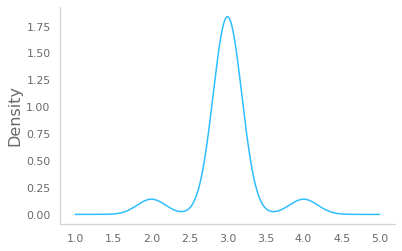

In [336]:
s = pd.Series([2, 3, 3.5,3.6,3.7,3.8, 4,4.2, 4.3,4.4,4.5, 5, 6])
s1=pd.Series([2,2,3,3,3,3,3,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3])
ax = s1.plot.kde()

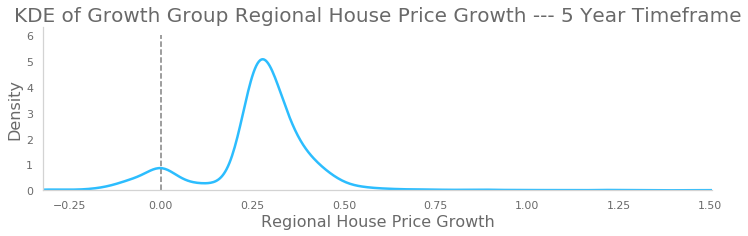

In [337]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.kde.html
plt.figure(figsize=(12,3))
arima_df['%5yGrowth'].plot.kde(lw=2.5);
'''Generate Kernel Density Estimate plot using Gaussian kernels.
In statistics, kernel density estimation (KDE) is a non-parametric 
way to estimate the probability density function (PDF) of a random 
variable. This function uses Gaussian kernels and includes automatic bandwidth determination.'''
plt.vlines(0,0,6,color='grey',linestyles='dashed')

plt.xlim(arima_df['%5yGrowth'].min(),arima_df['%5yGrowth'].max())
plt.ylim(0,)

plt.title('KDE of Growth Group Regional House Price Growth --- 5 Year Timeframe')
plt.xlabel('Regional House Price Growth');

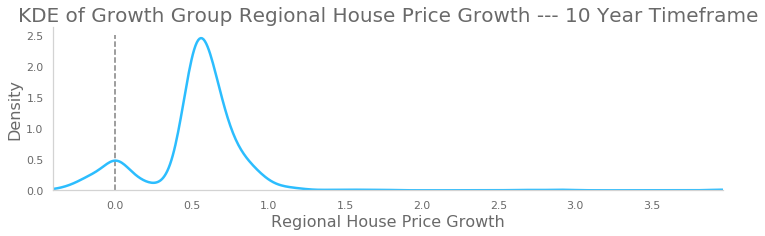

In [338]:
plt.figure(figsize=(12,3))
arima_df['%10yGrowth'].plot.kde(lw=2.5);
plt.vlines(0,0,2.5,color='grey',linestyles='dashed')

plt.xlim(arima_df['%10yGrowth'].min(),arima_df['%10yGrowth'].max())
plt.ylim(0,)

plt.title('KDE of Growth Group Regional House Price Growth --- 10 Year Timeframe')
plt.xlabel('Regional House Price Growth');

In [339]:
def forecast_width(regionID):
    
    '''
    Takes a regionID and returns the difference between the forecast's
    upper and lower estimates (at 95% confidence intervals) as
    a percentage of the average forecast
    '''
    #Isolate the region
    region = arima_df.loc[arima_df['RegionID']==regionID]

    #Find the forecast and lower/upper limits for the last forecasted period
    y_forecast = region['Forecast'].item()[-1]
    y_lower = region['Lower'].item()[-1]
    y_upper = region['Upper'].item()[-1]
    
    return (y_upper - y_lower) / y_forecast

arima_df['ForecastWidth'] = arima_df['RegionID'].map(lambda x: forecast_width(x))

In [340]:
#region = arima_df.loc[arima_df['RegionID']==91559]
#print(region['Forecast'].item()[-1])  ##.  521353.8336596232
#print(region['Lower'].item()[-1]) ##   -94076.31576351699
#print(region['Upper'].item()[-1]) ##. 1136783.9830827634
#arima_df

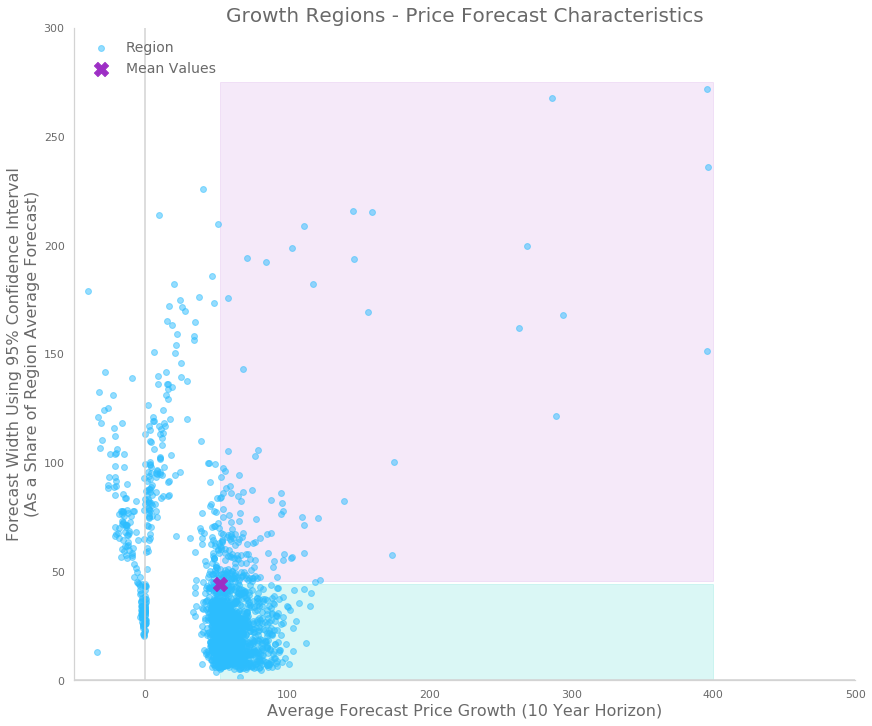

In [341]:
#calculate the average x and y values
avg_x = arima_df['%10yGrowth'].mean()
avg_y = arima_df['ForecastWidth'].mean()

plt.figure(figsize=(14,12))

# shade the region that is above both averages
plt.fill_between([avg_x*100, 400], [0,0], [avg_y*100, avg_y*100],
        color=CB91_Green, alpha=0.2)

plt.fill_between([avg_x*100, 400], [avg_y*100+1, avg_y*100+1], [275,275], 
        color=CB91_Purple, alpha=0.1)

#plot the scatter
plt.scatter(arima_df['%10yGrowth'] * 100, arima_df['ForecastWidth'] * 100,
            alpha=0.5, s=35, label='Region');

#and plot a point showing the average
plt.scatter(avg_x * 100, avg_y * 100, s=200,
            color=CB91_Purple, marker='X', label='Mean Values');

plt.axhline(0,color='lightgrey')
plt.axvline(0,color='lightgrey')

plt.ylim(0,300)
plt.xlim(-50,500)

plt.legend(loc=2, frameon=False, fontsize=14)

plt.title('Growth Regions - Price Forecast Characteristics')
plt.xlabel('Average Forecast Price Growth (10 Year Horizon)');
plt.ylabel('Forecast Width Using 95% Confidence Interval\
\n(As a Share of Region Average Forecast)');

In [342]:
def max_no_na(x):
    if len(list(x.dropna())) == 0:
        return None
    else:
        return max(list(x.dropna()))
    #return (x)
#arima_df['Maxpval'] = arima_df['Modelpvals'].map(lambda x: max_no_na(x))

In [347]:
def plot_forecasts(regions, labels=None, plot_range=True, start='2012-04-30', months=120, size=(16,8)):
    
    '''
    Takes a list of region codes, and plots their forcasted house prices.
    
    Parameters
    - regions (list): a list of regionIDs that we
                      want to plot (can be single integer)
    - labels (list): desired labels for the legend
                     (state code added automatically)
    - plot_range(bool): if True, will plot the forecast
                        range with 95% conf interval
    - start (str): The first date to include in
                   the dataframe (pass as 'YYYY-MM')
    - months (int): the number of months of forecast we want to show
    - size (int,int): the desired size of the plot
    
    '''
    #If we pass a single integer, put it in a list
    if type(regions) != list:
        regions = [regions]
    
    #Initiate a figure
    plt.figure(figsize=size)
    
    #Initiate a color counter
    counter=0
    
    #Iterate through each region and plot one by one
    for i in regions:
        #Find the non-forecasted part
        ts_real = ts_filter(i).iloc[:-7,:]     ###### ts_real is DataFrame
        x_real = ts_real.index
        y_real = ts_real
        #Work out how much we need to extend the x axis for the forecasts
        x_forecast = pd.date_range('2020-07-31', periods=months, freq='MS')
        
        #Identify the region, and plot it using the color from color list
        region_i = arima_df.loc[arima_df['RegionID']==i]
        
        #Specify the label
        if labels == None:
            label = f"{region_i['County'].item()} County, {region_i['State'].item()}"
        else:
            label = f"{labels[counter]}, {region_i['State'].item()}"
        
        y_forecast = region_i['Forecast'].item()[:months]

        color = color_list[counter]
        
        plt.plot(x_real, y_real, color=color,label = label, lw = 3)
        plt.plot(x_forecast,y_forecast, color=color, ls='--', label = '', lw = 3)
        
        #If we are showing ranges, find and plot these
        #if plot_range==True:
        y_lower = region_i['Lower'].item()[:months]
        y_upper = region_i['Upper'].item()[:months]
        plt.fill_between(x_forecast, y_lower, y_upper,facecolor=color, alpha = 0.15, interpolate=True)
        
        counter += 1

    plt.title('Price Forecasts (Limits Given to 95% Confidence Interval)')
    plt.ylabel('Avearge House Prices in Region ($)');
    
    plt.xlim(pd.to_datetime('2012-04-30', format='%Y-%m'),x_forecast[-1])
    plt.ylim(0,)

    plt.legend(loc=2, fontsize=14, frameon=False);

[91559, 93636, 93024, 67605, 90654, 74230, 94137, 91259, 74161]


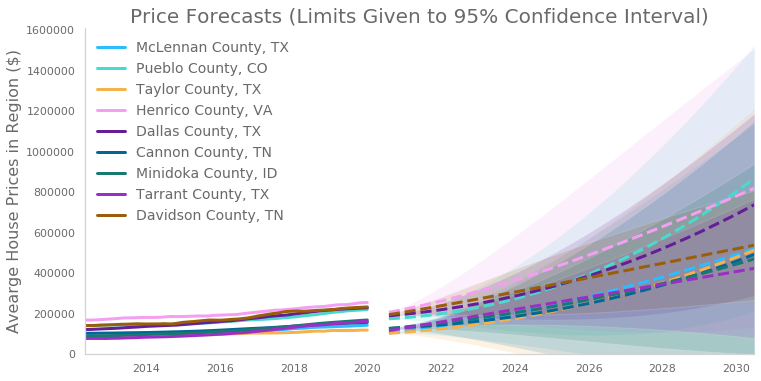

In [348]:
high_growth = list(arima_df.sort_values('%10yGrowth',ascending=False)['RegionID'][:9])
print(high_growth)
plot_forecasts((high_growth), size=(12,6))

In [349]:
best_regions = list(arima_df.loc[(arima_df['%10yGrowth'] > avg_x) &(arima_df['ForecastWidth'] < avg_y)].sort_values(
    '%10yGrowth', ascending=False)['RegionID'][:10])
print(best_regions)
reg_labels = []
#x = pd.DataFrame()
for i in best_regions:
    
    x = arima_df[arima_df['RegionID'] == i]
    #print(pd.DataFrame(x['County']))
    
    reg_labels.append(list(x['County']))

print(reg_labels)
outlst = [' '.join([str(c) for c in lst]) for lst in reg_labels]
outlst

[97530, 97702, 62027, 90671, 97513, 97691, 97920, 69450, 93281, 97693]
[['Santa Clara'], ['San Mateo'], ['Kings'], ['Collin'], ['Santa Clara'], ['Santa Clara'], ['Santa Clara'], ['Wake'], ['Denver'], ['Santa Clara']]


['Santa Clara',
 'San Mateo',
 'Kings',
 'Collin',
 'Santa Clara',
 'Santa Clara',
 'Santa Clara',
 'Wake',
 'Denver',
 'Santa Clara']

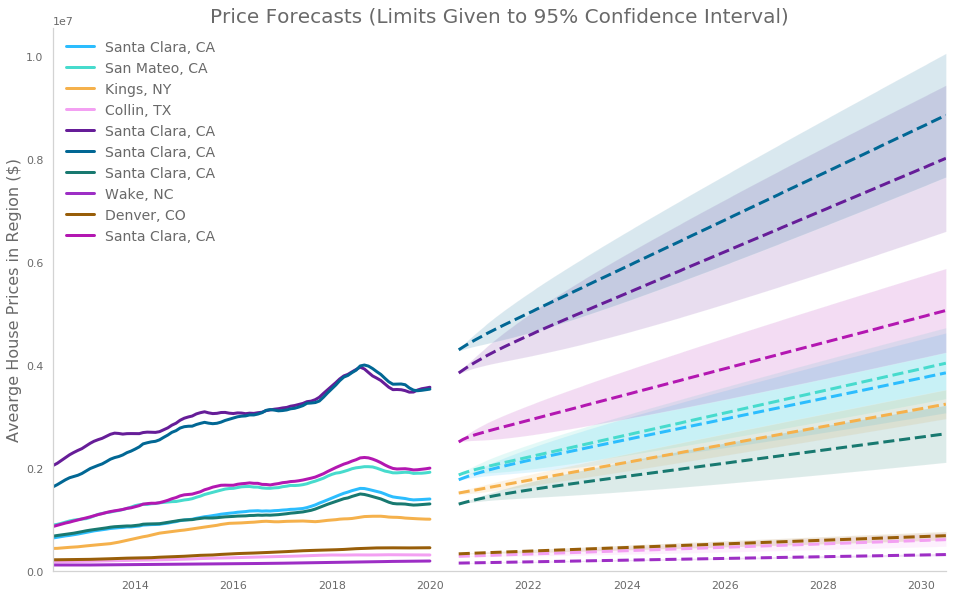

In [350]:
#reg_labels = ['Mountan View', 'Kings County', 'Plano', 'Los Altos', 'Palo Alto']

plot_forecasts(best_regions, labels = outlst, size=(16,10))


In [328]:
best_regions

[97530, 97702, 62027, 90671, 97513, 97691, 97920, 69450, 93281, 97693]

# Conclusion

In [246]:
df.loc[df['RegionID'].isin(best_regions)]

,RegionID,SizeRank,RegionName,State,City,Metro,CountyName,GrowthRegion,1996-01-31 00:00:00,1996-02-29 00:00:00,...,2019-10-31 00:00:00,2019-11-30 00:00:00,2019-12-31 00:00:00,2020-01-31 00:00:00,2020-02-29 00:00:00,2020-03-31 00:00:00,2020-04-30 00:00:00,2020-05-31 00:00:00,2020-06-30 00:00:00,2020-07-31 00:00:00
187,69450,191,27610,NC,Raleigh,Raleigh,Wake County,0,121241.0,121123.0,...,198103.0,198990.0,199751.0,200314.0,201151.0,202509.0,204192.0,205719.0,207052.0,208463.0
511,62027,516,11216,NY,New York,New York-Newark-Jersey City,Kings County,1,102164.0,101838.0,...,1016082.0,1013358.0,1012264.0,1016452.0,1021071.0,1024832.0,1029196.0,1035058.0,1043274.0,1049434.0
736,97920,742,95008,CA,Campbell,San Jose-Sunnyvale-Santa Clara,Santa Clara County,1,258055.0,257387.0,...,1295755.0,1301145.0,1308864.0,1322373.0,1333714.0,1343781.0,1345716.0,1336678.0,1331624.0,1331970.0
1989,90671,2007,75075,TX,Plano,Dallas-Fort Worth-Arlington,Collin County,1,159009.0,158644.0,...,318493.0,317811.0,316929.0,317579.0,318623.0,320050.0,321079.0,322281.0,323651.0,325459.0
2091,93281,2110,80204,CO,Denver,Denver-Aurora-Lakewood,Denver County,1,111109.0,111715.0,...,455487.0,456019.0,457436.0,459015.0,460420.0,461601.0,462368.0,462949.0,464209.0,465468.0
2297,97693,2315,94303,CA,Palo Alto,San Jose-Sunnyvale-Santa Clara,Santa Clara County,1,304261.0,303501.0,...,1981728.0,1991296.0,2004157.0,2023288.0,2036360.0,2047756.0,2045752.0,2028794.0,2014457.0,2005464.0
2741,97530,2767,94043,CA,Mountain View,San Jose-Sunnyvale-Santa Clara,Santa Clara County,1,241807.0,241624.0,...,1394509.0,1398444.0,1404179.0,1417175.0,1430479.0,1445002.0,1452701.0,1458185.0,1467742.0,1482649.0
4449,97702,4500,94402,CA,San Mateo,San Francisco-Oakland-Hayward,San Mateo County,1,346699.0,346144.0,...,1905694.0,1912865.0,1924295.0,1940385.0,1951204.0,1963324.0,1958016.0,1943183.0,1933364.0,1931656.0
6354,97691,6425,94301,CA,Palo Alto,San Jose-Sunnyvale-Santa Clara,Santa Clara County,1,610768.0,607264.0,...,3515605.0,3528072.0,3538972.0,3565737.0,3586248.0,3605453.0,3607199.0,3604196.0,3617596.0,3665394.0
6511,97513,6584,94022,CA,Los Altos,San Jose-Sunnyvale-Santa Clara,Santa Clara County,1,848157.0,845553.0,...,3546224.0,3559385.0,3575445.0,3609524.0,3637917.0,3666474.0,3671188.0,3674828.0,3689881.0,3719512.0


In [ ]:
calc_returns(best_regions).tail()